## Step1: Put all libraries and packages at top

### Standard imports

In [1]:
# files and system
import os
import sys

In [2]:
import time
import random

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

In [3]:
# working with images
import cv2
import imageio
import scipy.ndimage
import skimage.transform

import torchvision.transforms as transforms

In [4]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

import torchsummary
from tqdm import notebook

### Custom imports

In [5]:
sys.path.insert(0, '..')

# losses
from utils.metrics import iou_pytorch_eval, iou_pytorch_test, IoULoss, IoUBCELoss

# dataset
from utils.dataset import myDataSet

sys.path.insert(0, './notebooks')

In [6]:
sys.path.insert(0, '../models')

# models
from unet import UNet

sys.path.insert(0, '../notebooks')

## Step 2: Fix a seed for reproducibility, and choose the DEVICE

In [7]:
random_seed=42
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True

In [8]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu") # select device for training, i.e. gpu or cpu
print(DEVICE)

cuda


## Step 3: Set your transforms, e.g, normalisation, resizing, rotation, flip, padding etc

In [9]:
_size = 256, 256
resize = transforms.Resize(_size, interpolation=0)

# set your transforms 
train_transforms = transforms.Compose([
                           transforms.Resize(_size, interpolation=0),
                           transforms.RandomRotation(180), # allow any rotation
                           transforms.RandomHorizontalFlip(0.5),
                           transforms.RandomCrop(_size, padding = 10), # needed after rotation (with original size)
                       ])

test_transforms = transforms.Compose([
                           transforms.Resize(_size, interpolation=0),
                       ])

## Step 4: Make your train and validation data loader with option to augment or not

In [10]:
path_images = "../data/train-val/images"
path_masks = "../data/train-val/masks"


# pre-defined split
with open('../train-val-split/train.txt', 'r') as f:
    ids_train = [l.strip()+'.jpg' for l in f]
with open('../train-val-split/val.txt', 'r') as f:
    ids_val = [l.strip()+'.jpg' for l in f]


custom_dataset_train = myDataSet(ids_train, path_images, path_masks, transforms=train_transforms)
custom_dataset_val = myDataSet(ids_val, path_images, path_masks, transforms=test_transforms)

print("My custom training-dataset has {} elements".format(len(custom_dataset_train)))
print("My custom validation-dataset has {} elements".format(len(custom_dataset_val)))

My custom training-dataset has 880 elements
My custom validation-dataset has 120 elements


In [11]:
BATCH_SIZE = 20

# Create dataloaders from datasets with the native pytorch functions
dataloader_train = torch.utils.data.DataLoader(custom_dataset_train, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
dataloader_val = torch.utils.data.DataLoader(custom_dataset_val, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

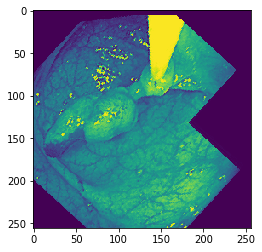

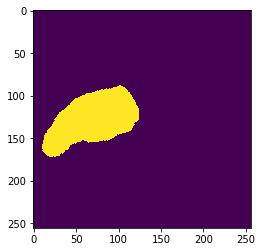

In [12]:
# Show example images.
image_number = 23
img, mask = custom_dataset_train.__getitem__(image_number)


# image
plt.figure()
plt.imshow(img.mean(0)) # 3 channels, take mean

# mask
plt.figure()
plt.imshow(mask[0, :, :]) # 1 channel, take it

plt.show()

In [13]:
custom_dataset_train.__getitem__(image_number)[0].shape

torch.Size([3, 256, 256])

In [14]:
custom_dataset_train.__getitem__(image_number)[1].shape, np.unique(custom_dataset_train.__getitem__(image_number)[1])

(torch.Size([1, 256, 256]), array([0., 1.], dtype=float32))

## Pipeline

In [15]:
def train(model, optim, criterion, dataloader, epoch, device):
    pass

In [16]:
def test(model, criterion, dataloader, epoch, device, best_acc, model_name='model'):
    pass

# Training hyperparameters

In [17]:
# Begin training
model = UNet(channel_in=3, channel_out=1)
model = model.to(DEVICE) # load model to DEVICE

In [18]:
# Define variables for the training
epochs = 70

In [19]:
# Define optimiser and criterion for the training. You can try different ones to see which works best for your data and task
optimiser = torch.optim.Adam(model.parameters(), lr = 1e-4, weight_decay = 1e-8)

# criterion = nn.BCEWithLogitsLoss()
# model_name = 'UNet_BCEWithLogitsLoss_augmented'

criterion = IoULoss()
model_name = 'UNet_IoULoss_augmented'

# criterion = IoUBCELoss()
# model_name = 'UNet_IoUBCELoss_augmented'


# Training

 Epoch: 0 of 70, Iter.: 44 of 44, Loss: -0.219956, Val. Loss: -0.231264
 Epoch: 0 of 70, Iter.: 44 of 44, IoU: 0.291830, Val. IoU: 0.269275


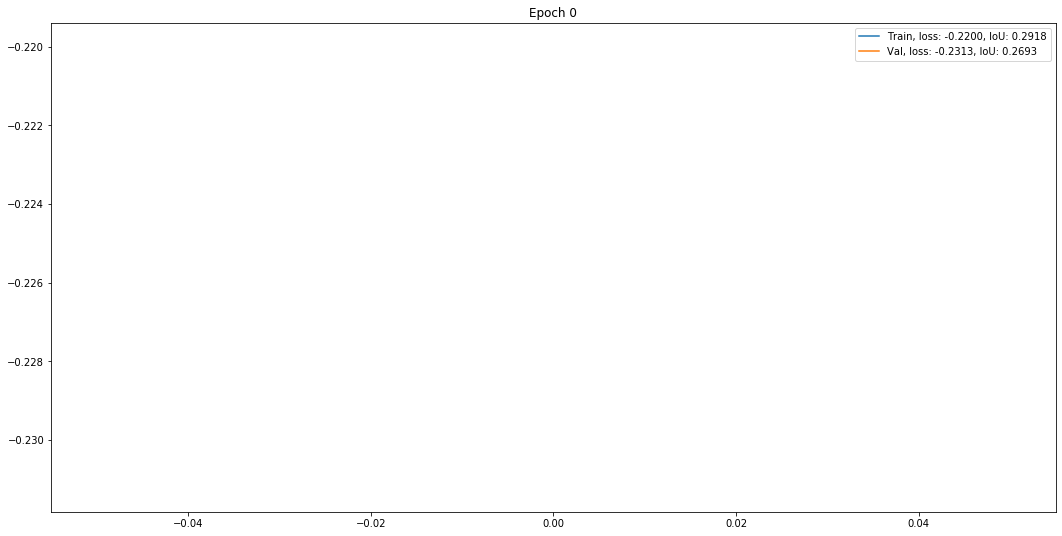

 Epoch: 1 of 70, Iter.: 44 of 44, Loss: -0.273373, Val. Loss: -0.260659
 Epoch: 1 of 70, Iter.: 44 of 44, IoU: 0.358517, Val. IoU: 0.330514


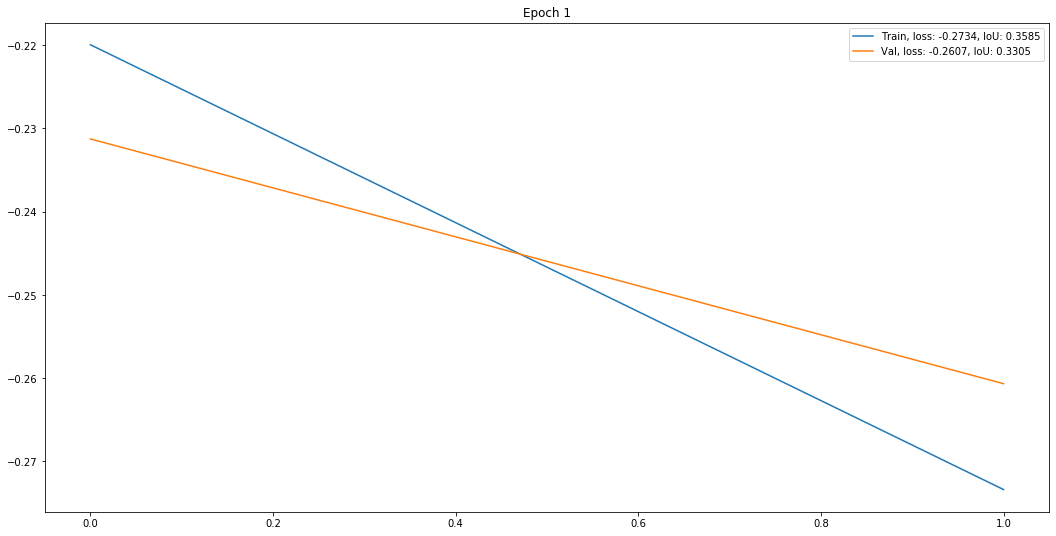

 Epoch: 2 of 70, Iter.: 44 of 44, Loss: -0.296347, Val. Loss: -0.276531
 Epoch: 2 of 70, Iter.: 44 of 44, IoU: 0.381646, Val. IoU: 0.323366


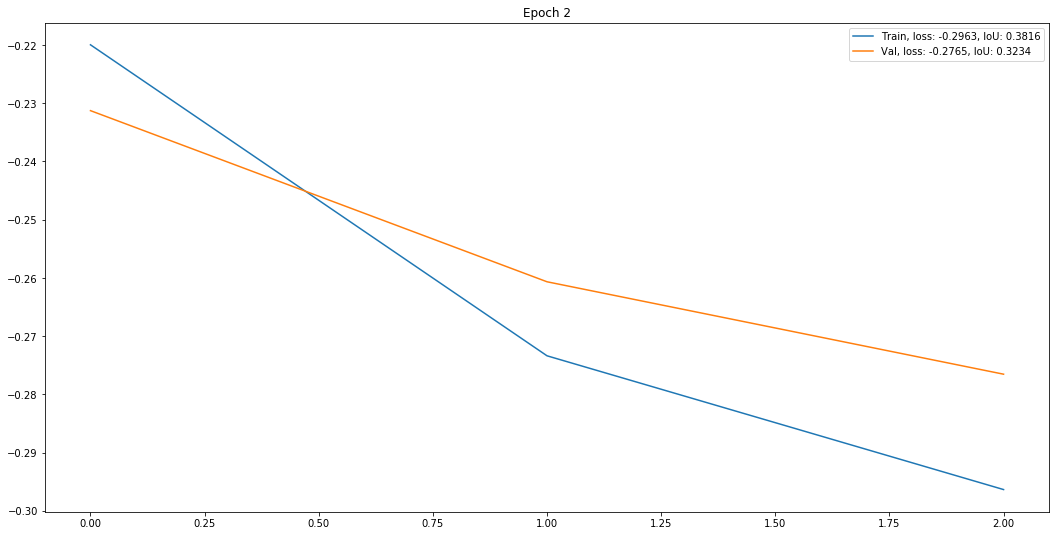

 Epoch: 3 of 70, Iter.: 44 of 44, Loss: -0.315471, Val. Loss: -0.287220
 Epoch: 3 of 70, Iter.: 44 of 44, IoU: 0.395644, Val. IoU: 0.328989


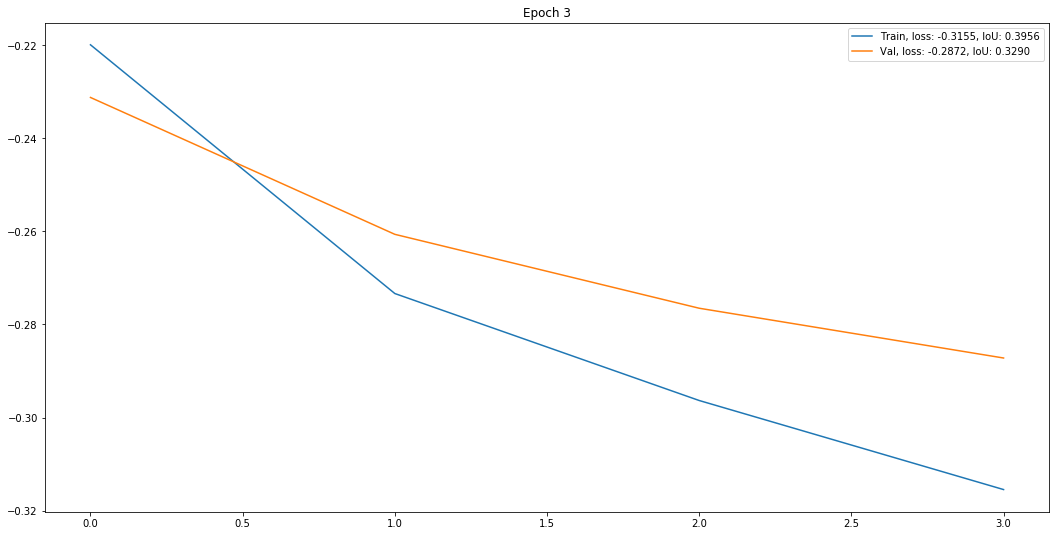

 Epoch: 4 of 70, Iter.: 44 of 44, Loss: -0.334049, Val. Loss: -0.304282
 Epoch: 4 of 70, Iter.: 44 of 44, IoU: 0.412071, Val. IoU: 0.345749


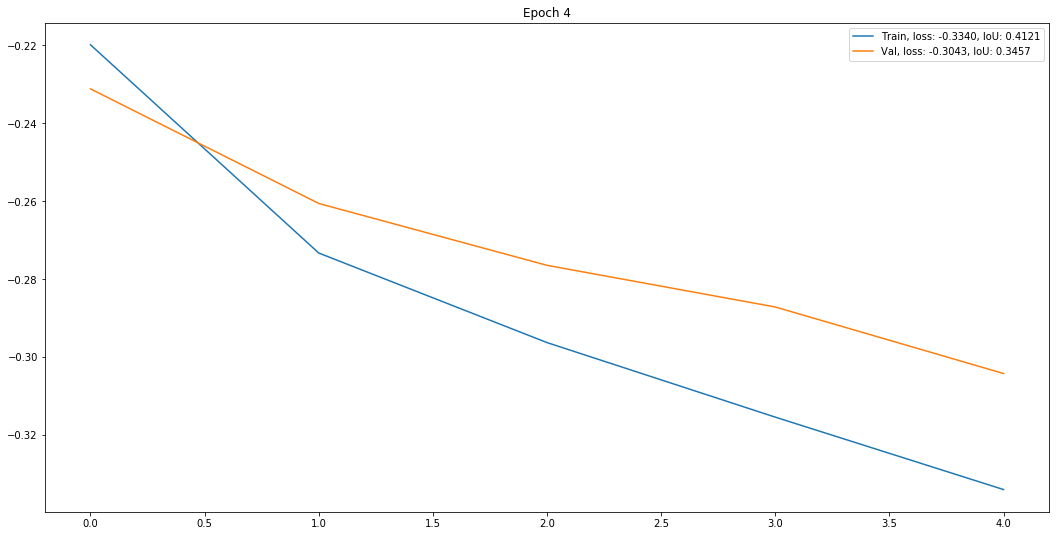

 Epoch: 5 of 70, Iter.: 44 of 44, Loss: -0.351181, Val. Loss: -0.309100
 Epoch: 5 of 70, Iter.: 44 of 44, IoU: 0.423267, Val. IoU: 0.350595


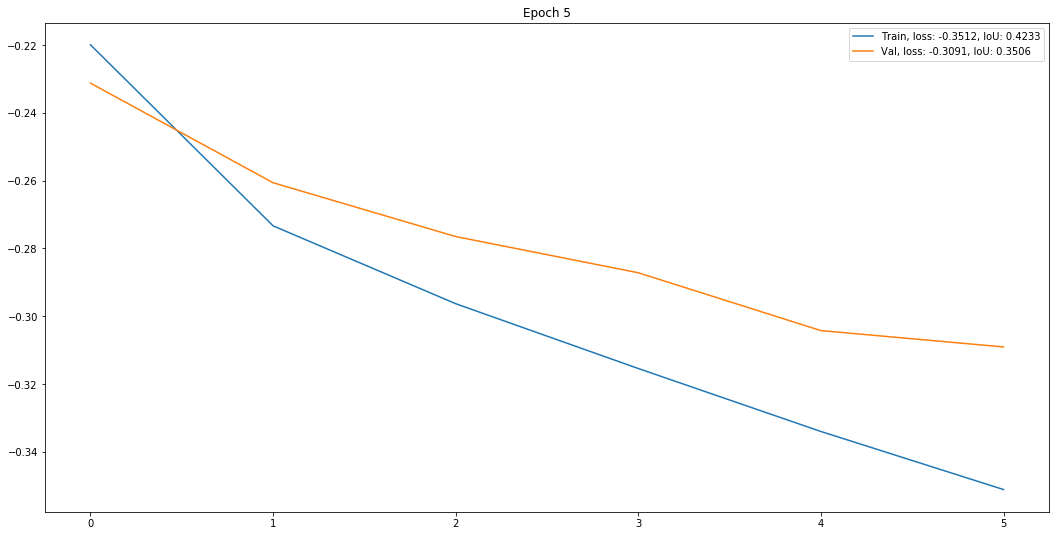

 Epoch: 6 of 70, Iter.: 44 of 44, Loss: -0.364763, Val. Loss: -0.325325
 Epoch: 6 of 70, Iter.: 44 of 44, IoU: 0.435855, Val. IoU: 0.375866


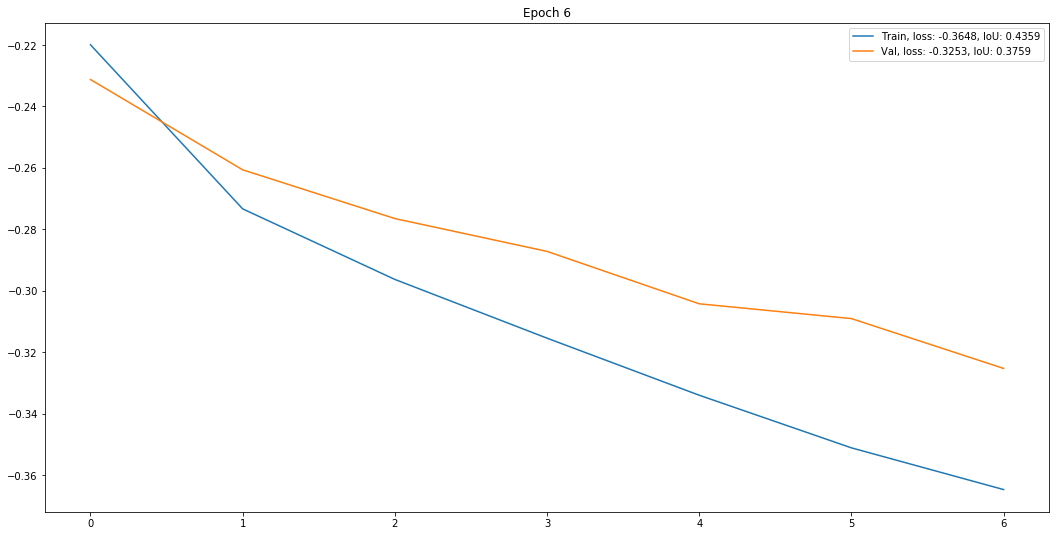

 Epoch: 7 of 70, Iter.: 44 of 44, Loss: -0.381655, Val. Loss: -0.325696
 Epoch: 7 of 70, Iter.: 44 of 44, IoU: 0.456921, Val. IoU: 0.359641


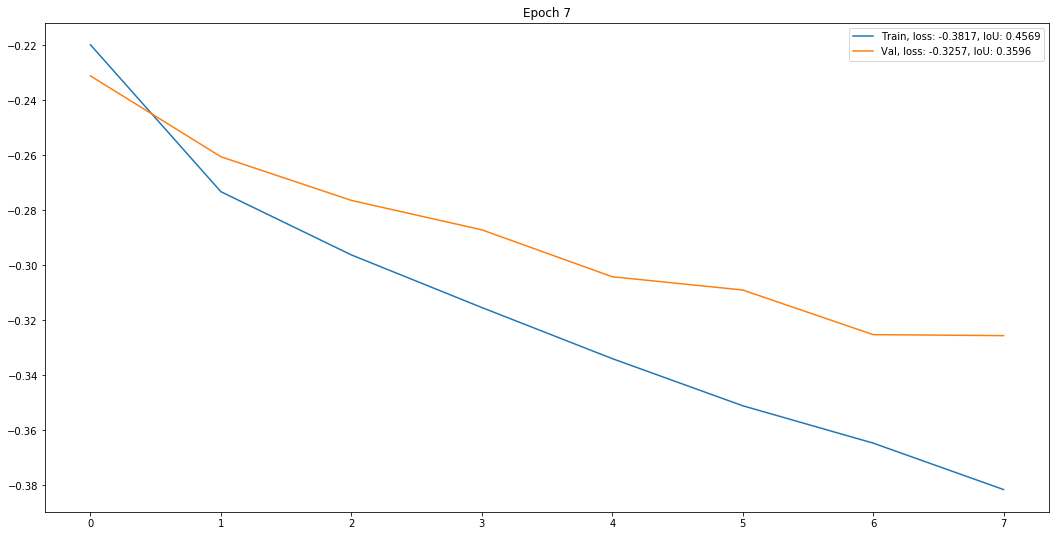

 Epoch: 8 of 70, Iter.: 44 of 44, Loss: -0.396463, Val. Loss: -0.376770
 Epoch: 8 of 70, Iter.: 44 of 44, IoU: 0.466271, Val. IoU: 0.428354


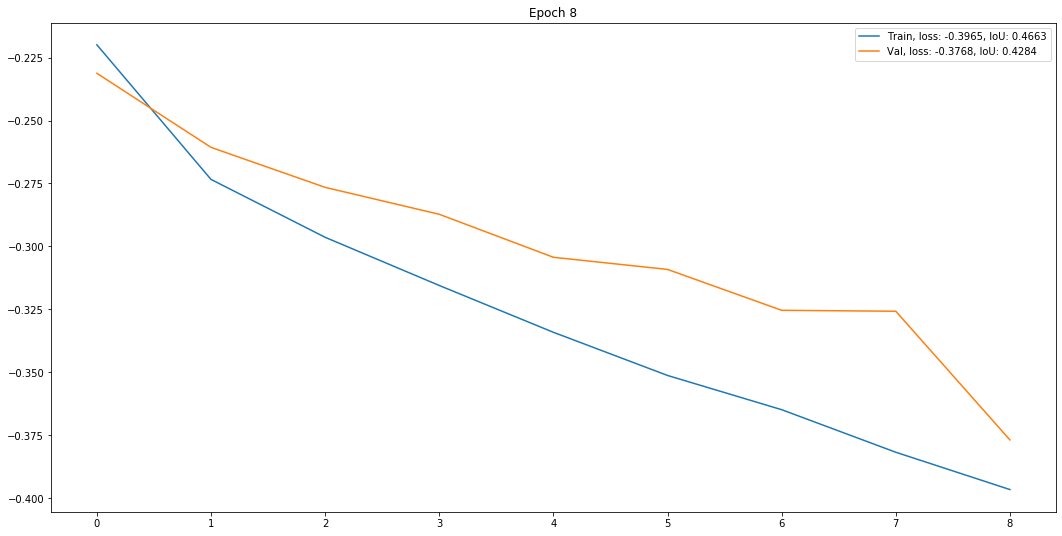

 Epoch: 9 of 70, Iter.: 44 of 44, Loss: -0.422247, Val. Loss: -0.369756
 Epoch: 9 of 70, Iter.: 44 of 44, IoU: 0.502614, Val. IoU: 0.451830


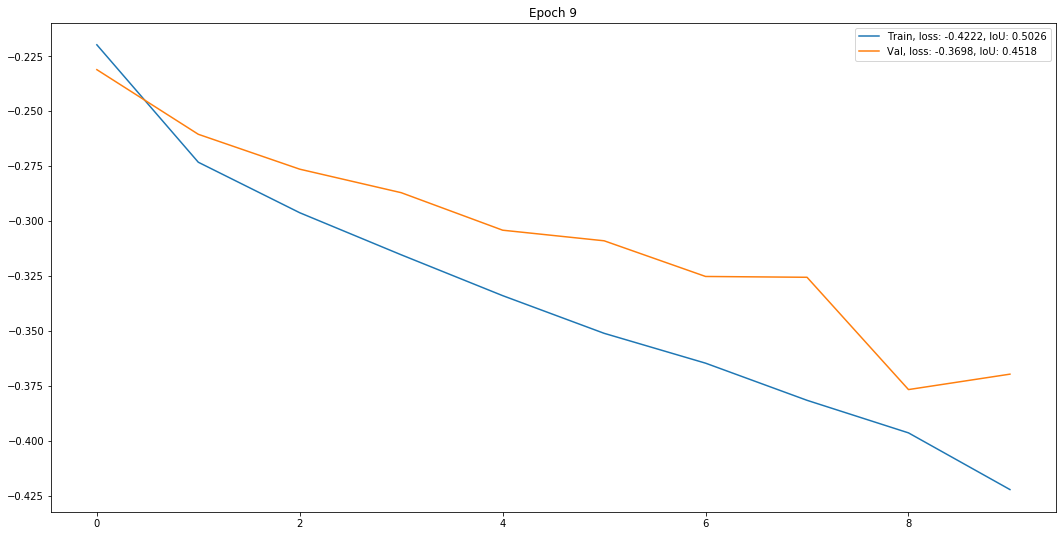

 Epoch: 10 of 70, Iter.: 44 of 44, Loss: -0.432517, Val. Loss: -0.395653
 Epoch: 10 of 70, Iter.: 44 of 44, IoU: 0.507603, Val. IoU: 0.448296


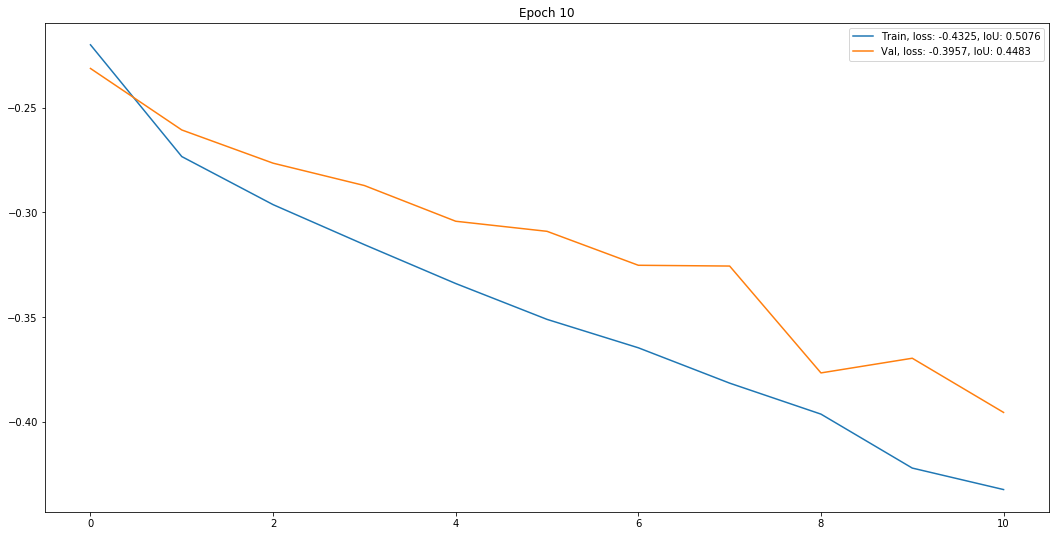

 Epoch: 11 of 70, Iter.: 44 of 44, Loss: -0.460247, Val. Loss: -0.400033
 Epoch: 11 of 70, Iter.: 44 of 44, IoU: 0.544367, Val. IoU: 0.455554


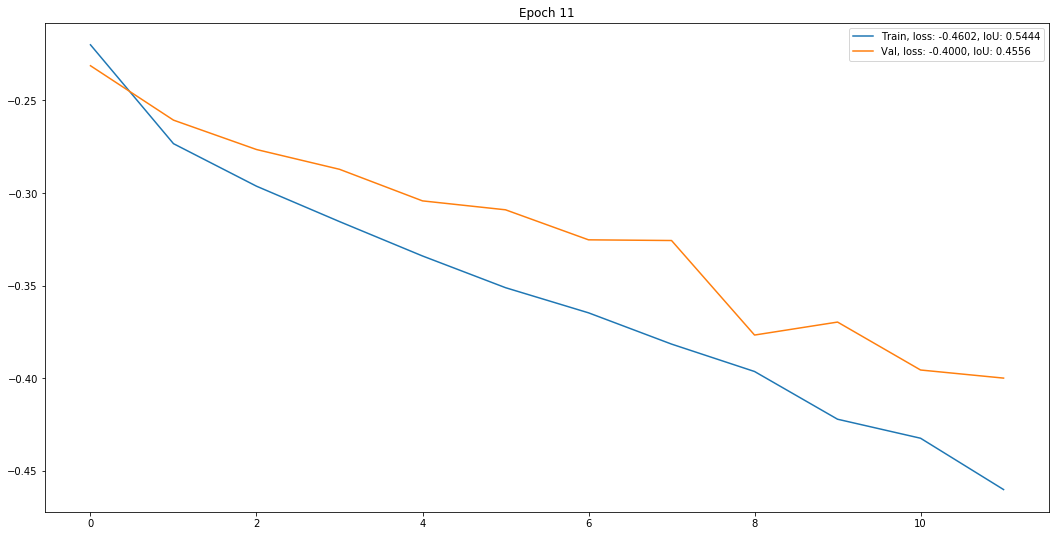

 Epoch: 12 of 70, Iter.: 44 of 44, Loss: -0.474998, Val. Loss: -0.448620
 Epoch: 12 of 70, Iter.: 44 of 44, IoU: 0.558184, Val. IoU: 0.528491


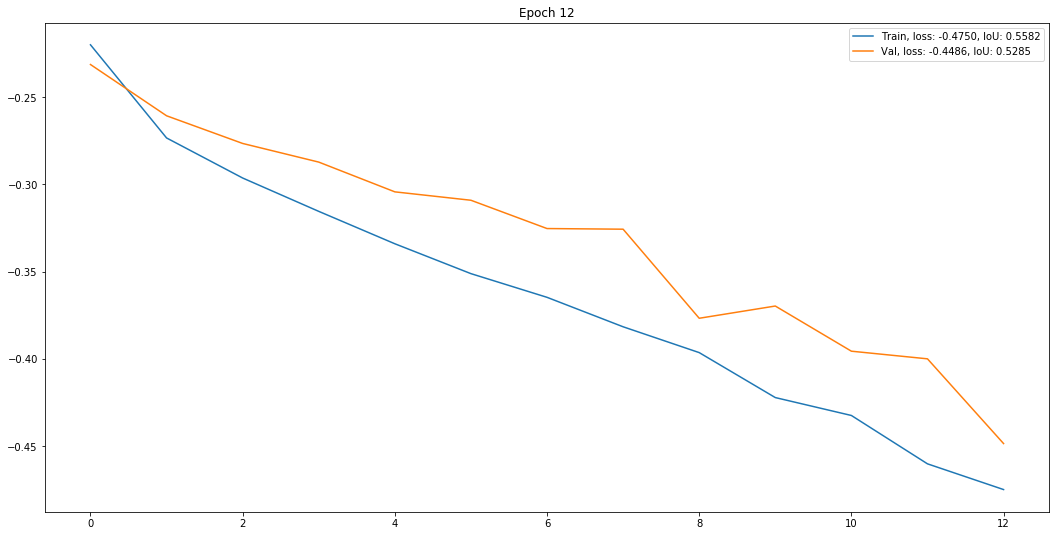

 Epoch: 13 of 70, Iter.: 44 of 44, Loss: -0.494081, Val. Loss: -0.432520
 Epoch: 13 of 70, Iter.: 44 of 44, IoU: 0.577049, Val. IoU: 0.488090


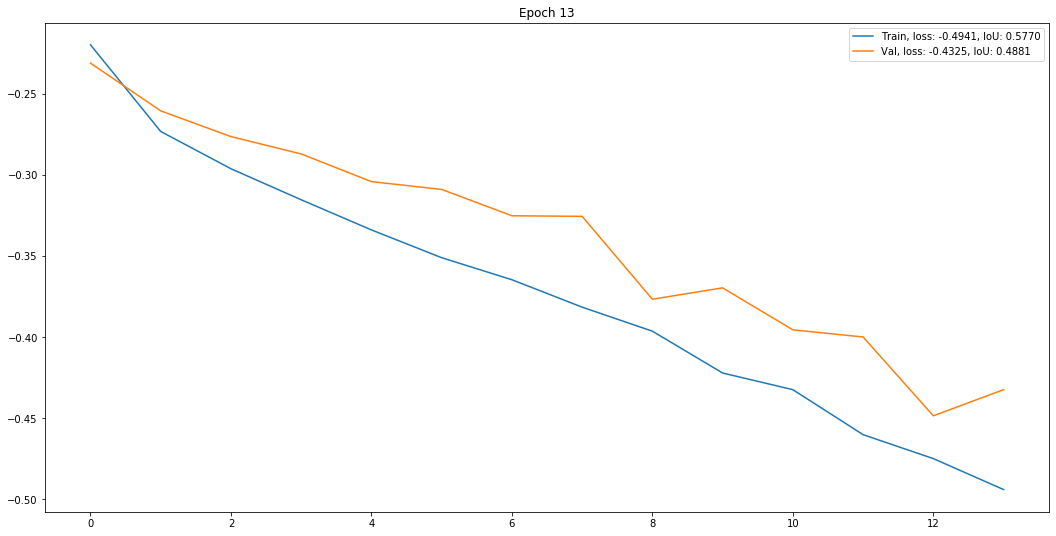

 Epoch: 14 of 70, Iter.: 44 of 44, Loss: -0.512353, Val. Loss: -0.459861
 Epoch: 14 of 70, Iter.: 44 of 44, IoU: 0.593964, Val. IoU: 0.532258


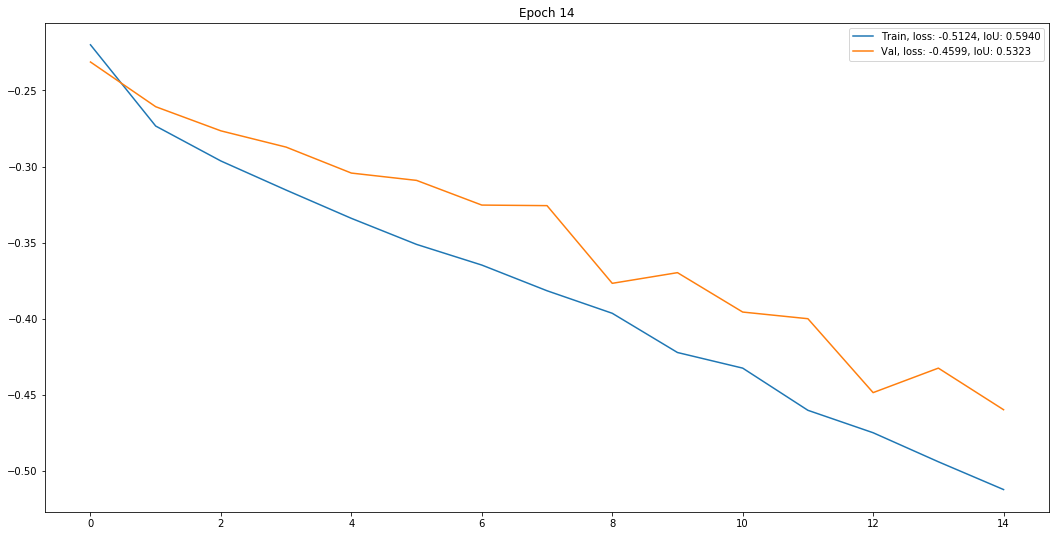

 Epoch: 15 of 70, Iter.: 44 of 44, Loss: -0.529563, Val. Loss: -0.462339
 Epoch: 15 of 70, Iter.: 44 of 44, IoU: 0.599325, Val. IoU: 0.521720


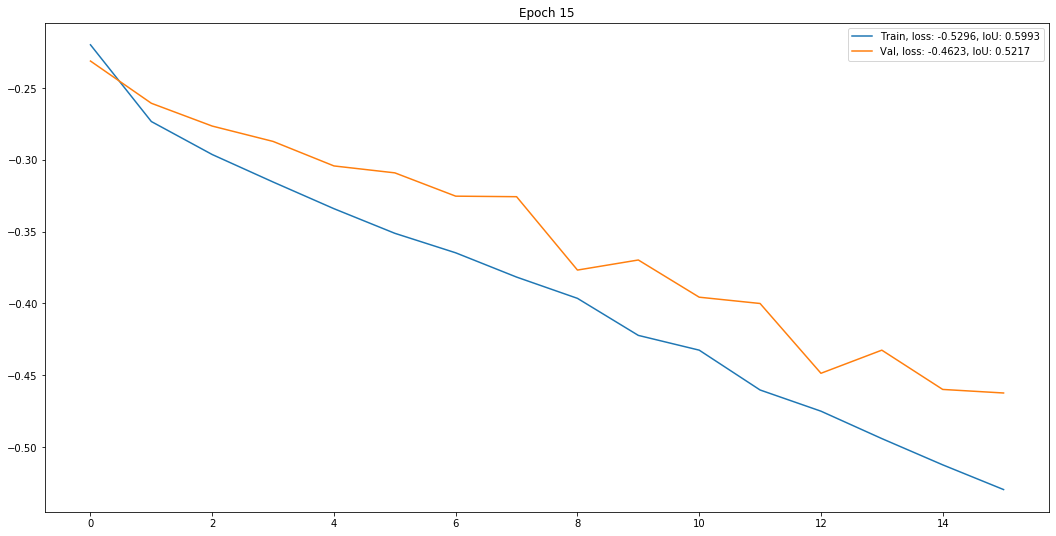

 Epoch: 16 of 70, Iter.: 44 of 44, Loss: -0.541314, Val. Loss: -0.473130
 Epoch: 16 of 70, Iter.: 44 of 44, IoU: 0.615887, Val. IoU: 0.532257


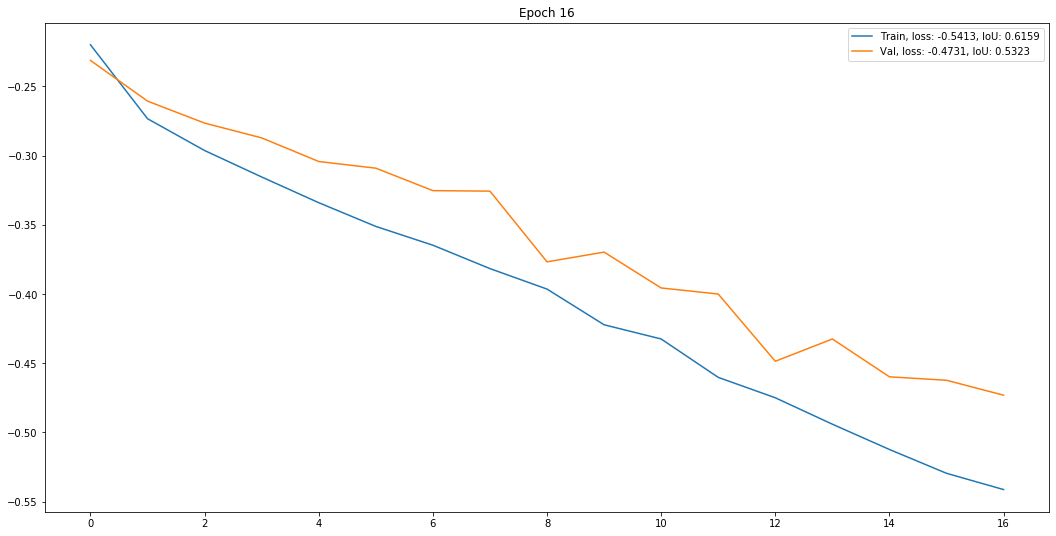

 Epoch: 17 of 70, Iter.: 44 of 44, Loss: -0.570197, Val. Loss: -0.519496
 Epoch: 17 of 70, Iter.: 44 of 44, IoU: 0.640723, Val. IoU: 0.585650


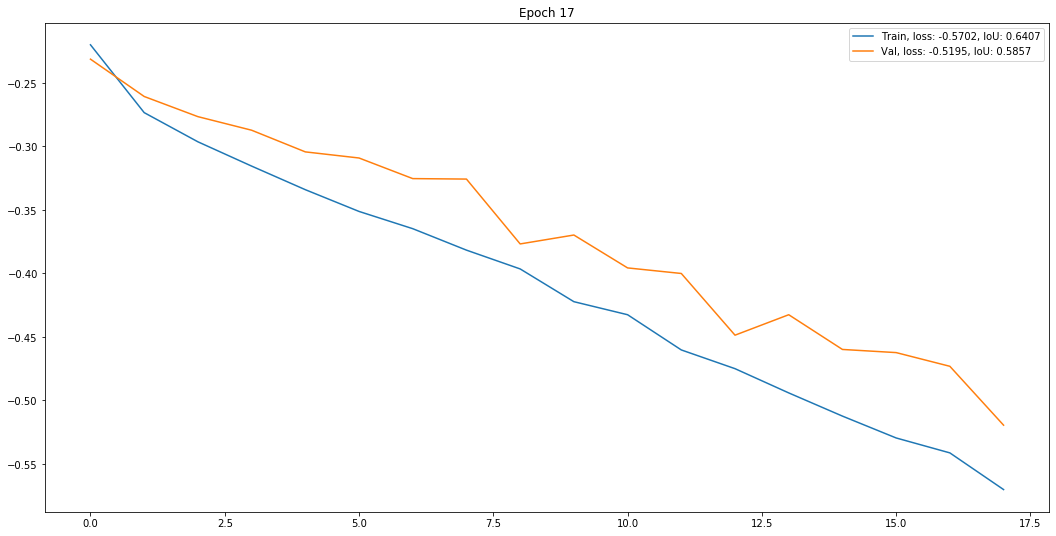

 Epoch: 18 of 70, Iter.: 44 of 44, Loss: -0.567616, Val. Loss: -0.516111
 Epoch: 18 of 70, Iter.: 44 of 44, IoU: 0.633047, Val. IoU: 0.560892


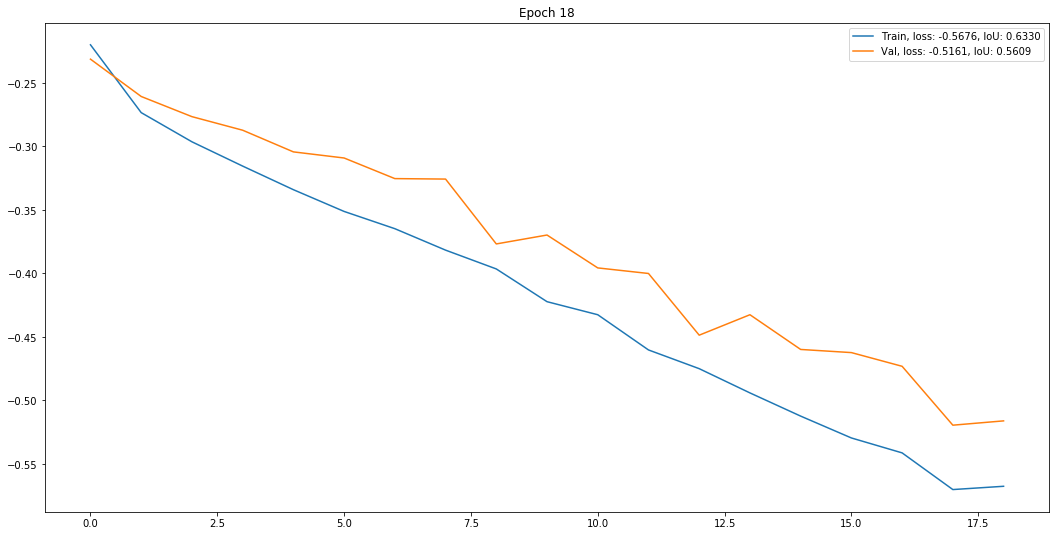

 Epoch: 19 of 70, Iter.: 44 of 44, Loss: -0.582803, Val. Loss: -0.480485
 Epoch: 19 of 70, Iter.: 44 of 44, IoU: 0.638093, Val. IoU: 0.519528


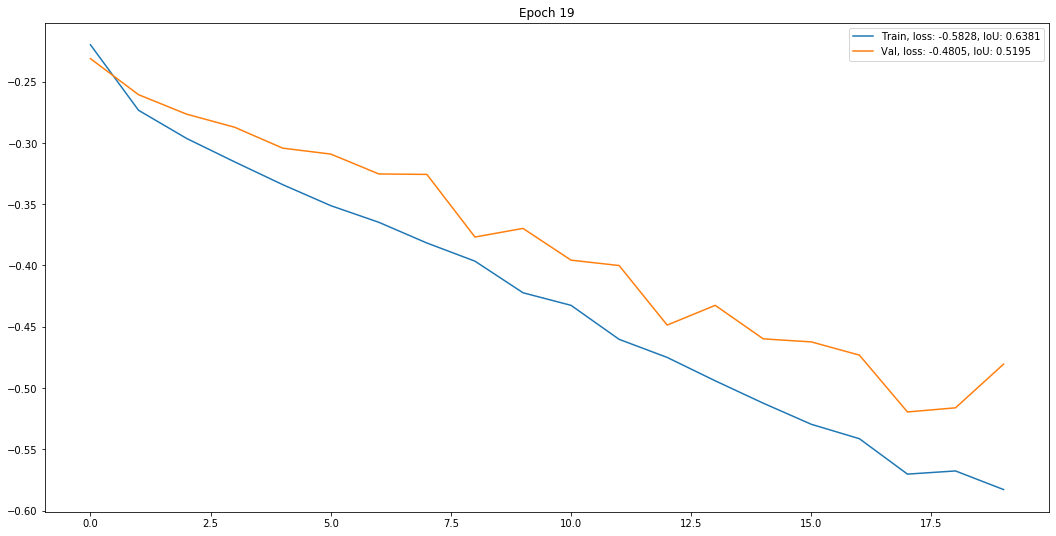

 Epoch: 20 of 70, Iter.: 44 of 44, Loss: -0.598358, Val. Loss: -0.472403
 Epoch: 20 of 70, Iter.: 44 of 44, IoU: 0.647316, Val. IoU: 0.517526


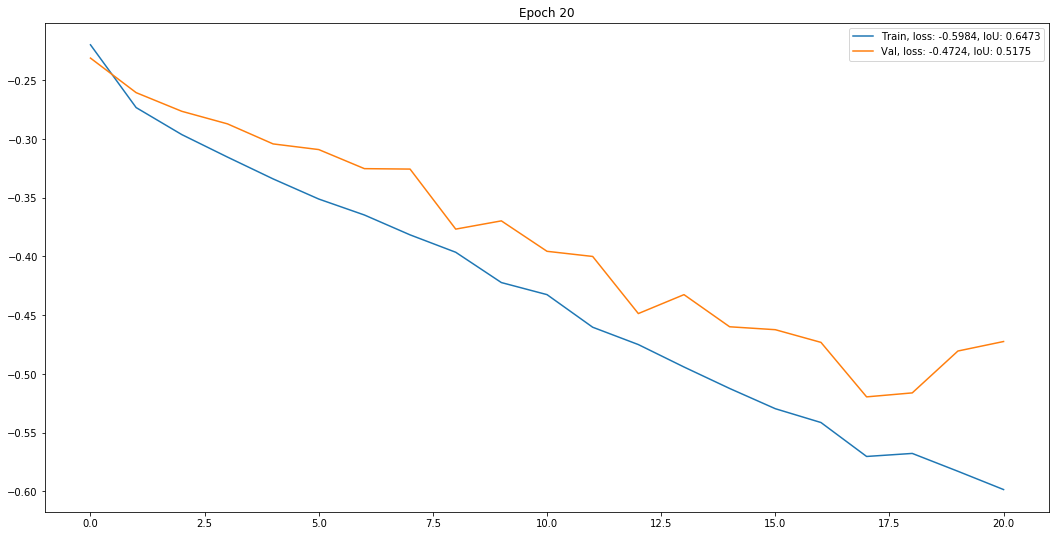

 Epoch: 21 of 70, Iter.: 44 of 44, Loss: -0.607854, Val. Loss: -0.558687
 Epoch: 21 of 70, Iter.: 44 of 44, IoU: 0.659529, Val. IoU: 0.623066


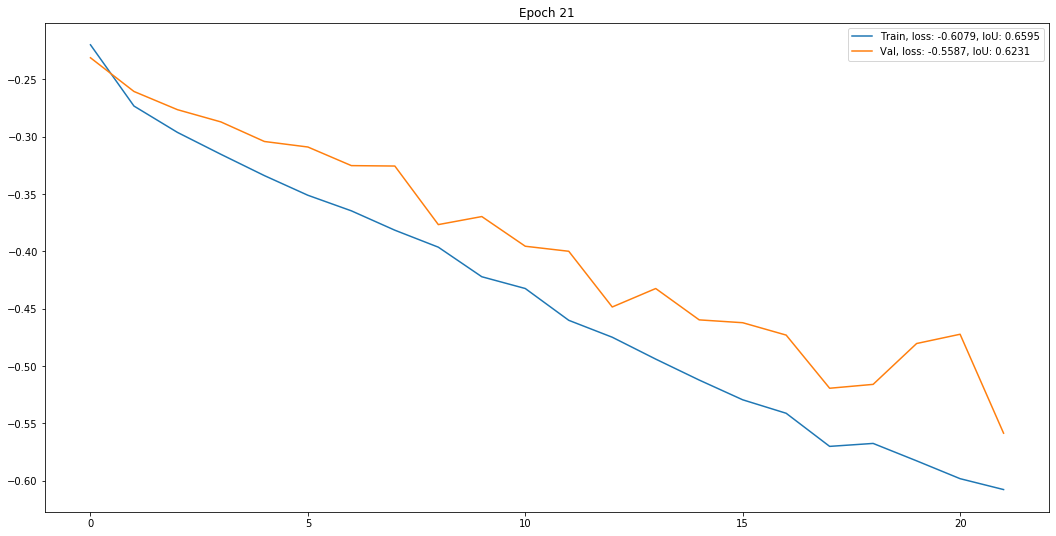

 Epoch: 22 of 70, Iter.: 44 of 44, Loss: -0.608412, Val. Loss: -0.560922
 Epoch: 22 of 70, Iter.: 44 of 44, IoU: 0.657486, Val. IoU: 0.604997


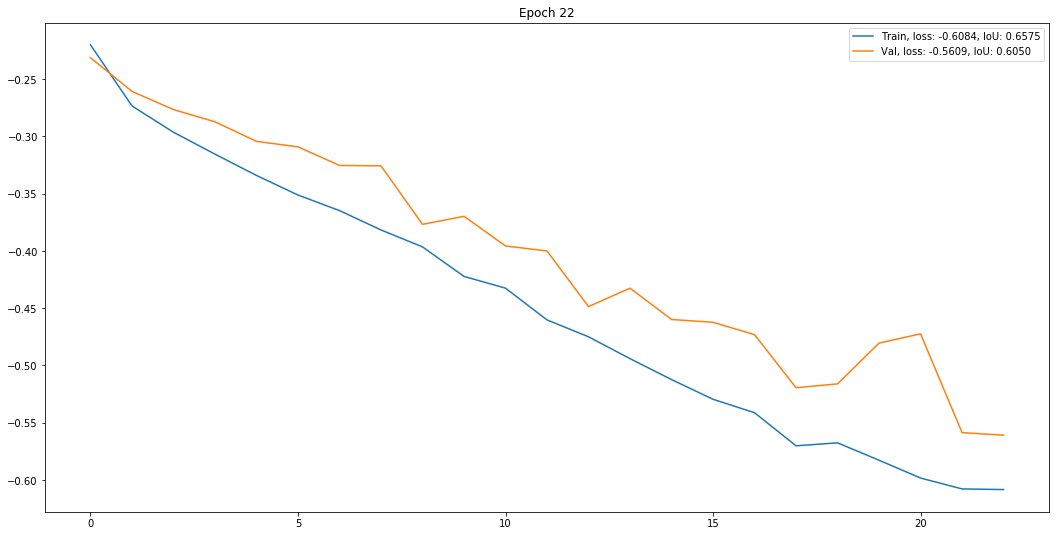

 Epoch: 23 of 70, Iter.: 44 of 44, Loss: -0.619179, Val. Loss: -0.562251
 Epoch: 23 of 70, Iter.: 44 of 44, IoU: 0.663071, Val. IoU: 0.607454


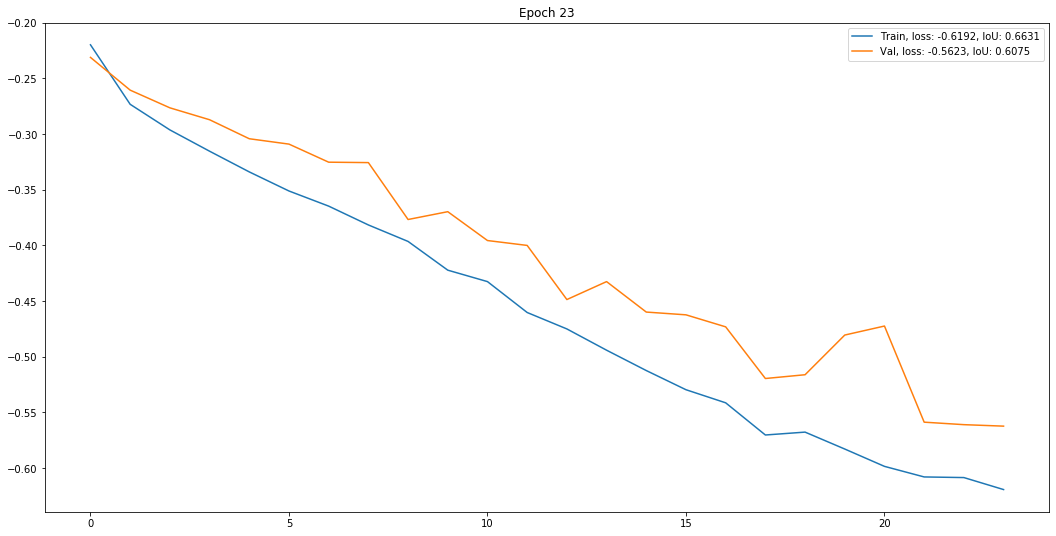

 Epoch: 24 of 70, Iter.: 44 of 44, Loss: -0.625518, Val. Loss: -0.489740
 Epoch: 24 of 70, Iter.: 44 of 44, IoU: 0.664444, Val. IoU: 0.525264


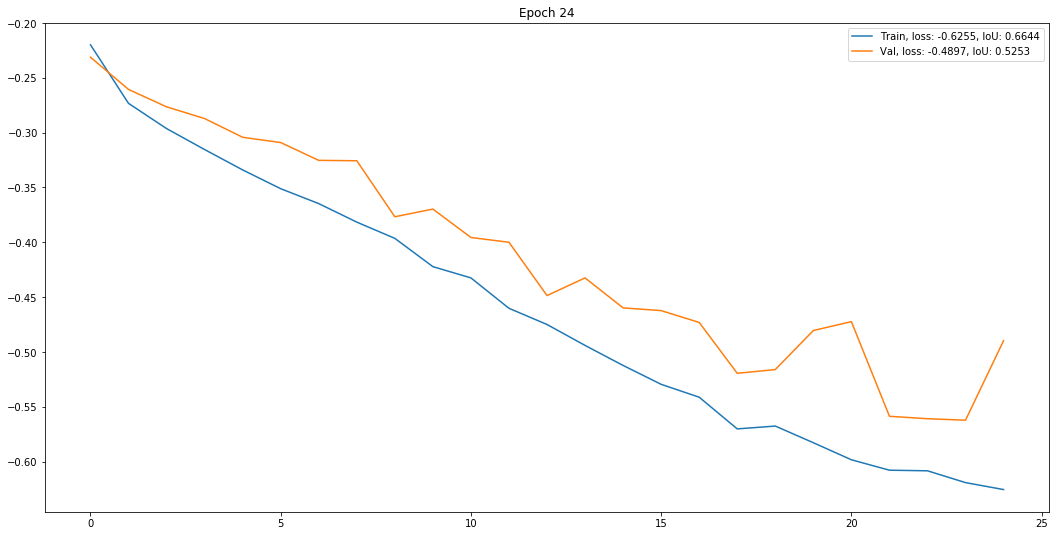

 Epoch: 25 of 70, Iter.: 44 of 44, Loss: -0.637994, Val. Loss: -0.548556
 Epoch: 25 of 70, Iter.: 44 of 44, IoU: 0.677462, Val. IoU: 0.588339


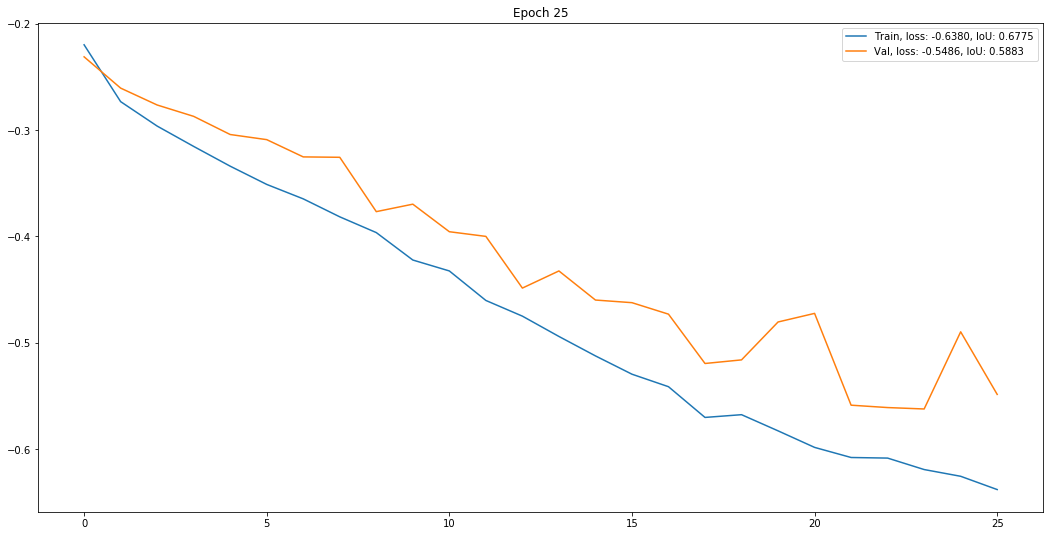

 Epoch: 26 of 70, Iter.: 44 of 44, Loss: -0.643582, Val. Loss: -0.567426
 Epoch: 26 of 70, Iter.: 44 of 44, IoU: 0.682797, Val. IoU: 0.604463


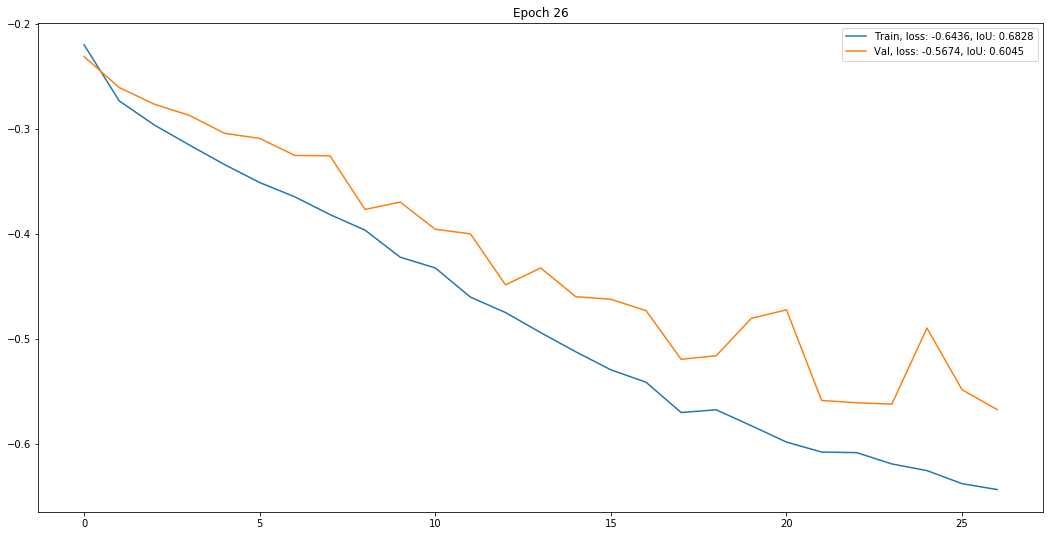

 Epoch: 27 of 70, Iter.: 44 of 44, Loss: -0.645919, Val. Loss: -0.532761
 Epoch: 27 of 70, Iter.: 44 of 44, IoU: 0.680304, Val. IoU: 0.541984


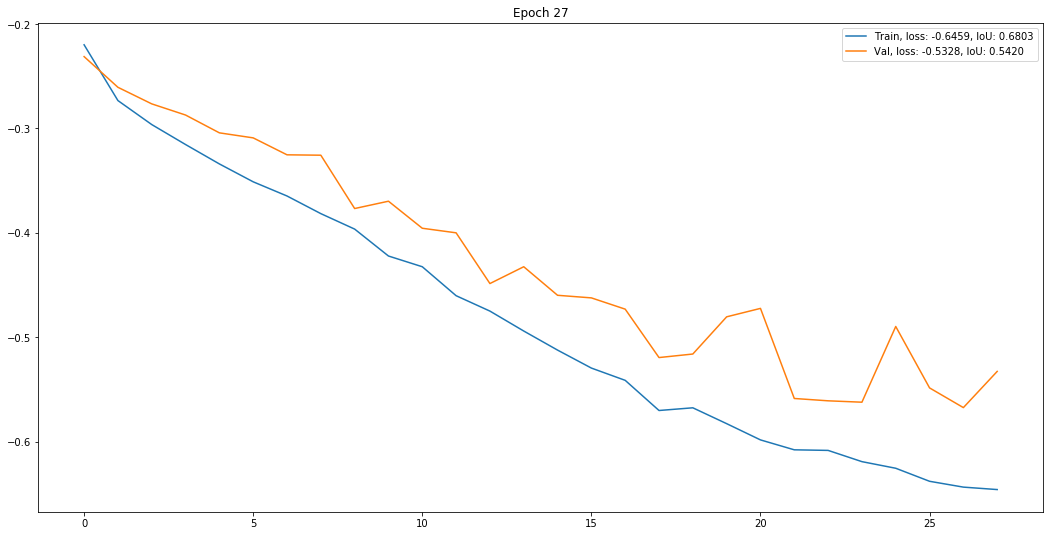

 Epoch: 28 of 70, Iter.: 44 of 44, Loss: -0.648402, Val. Loss: -0.568116
 Epoch: 28 of 70, Iter.: 44 of 44, IoU: 0.678855, Val. IoU: 0.592343


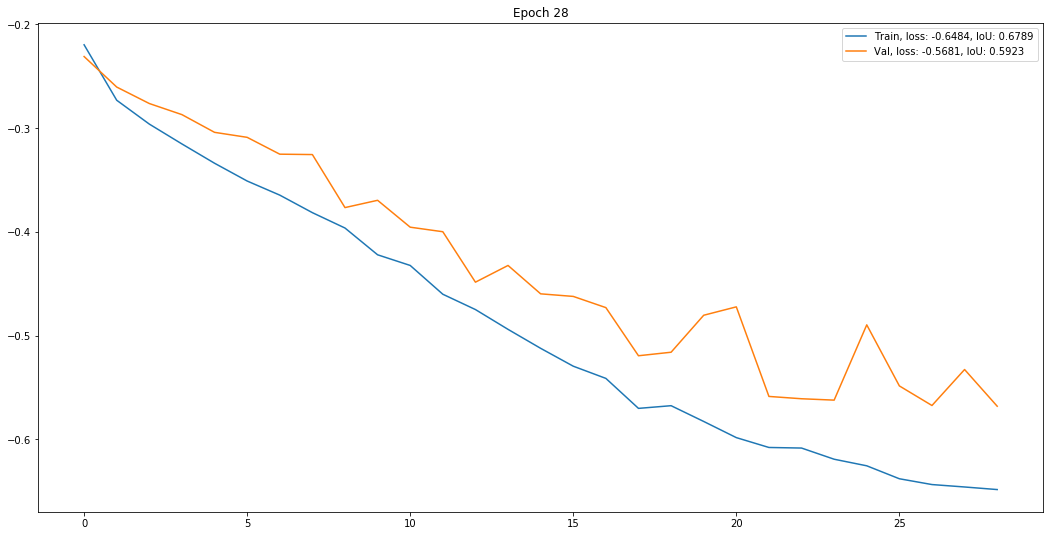

 Epoch: 29 of 70, Iter.: 44 of 44, Loss: -0.651318, Val. Loss: -0.519330
 Epoch: 29 of 70, Iter.: 44 of 44, IoU: 0.683757, Val. IoU: 0.550488


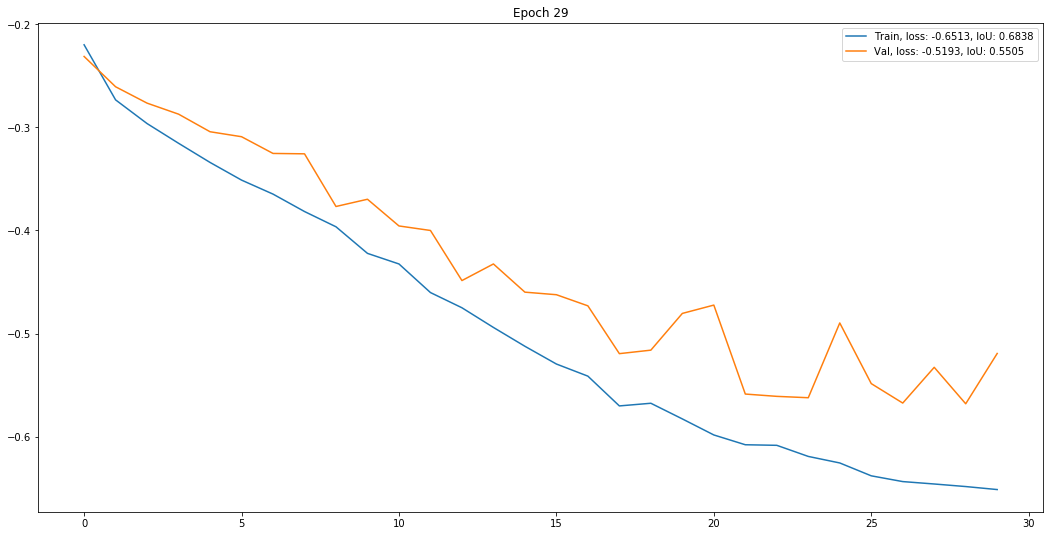

 Epoch: 30 of 70, Iter.: 44 of 44, Loss: -0.663750, Val. Loss: -0.581757
 Epoch: 30 of 70, Iter.: 44 of 44, IoU: 0.696149, Val. IoU: 0.624165


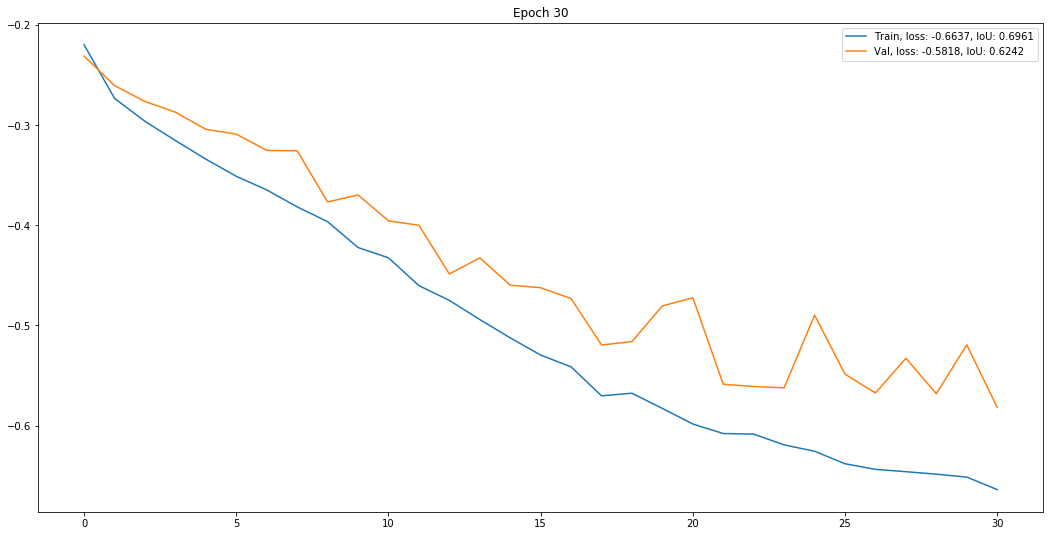

 Epoch: 31 of 70, Iter.: 44 of 44, Loss: -0.672593, Val. Loss: -0.596354
 Epoch: 31 of 70, Iter.: 44 of 44, IoU: 0.705663, Val. IoU: 0.629095


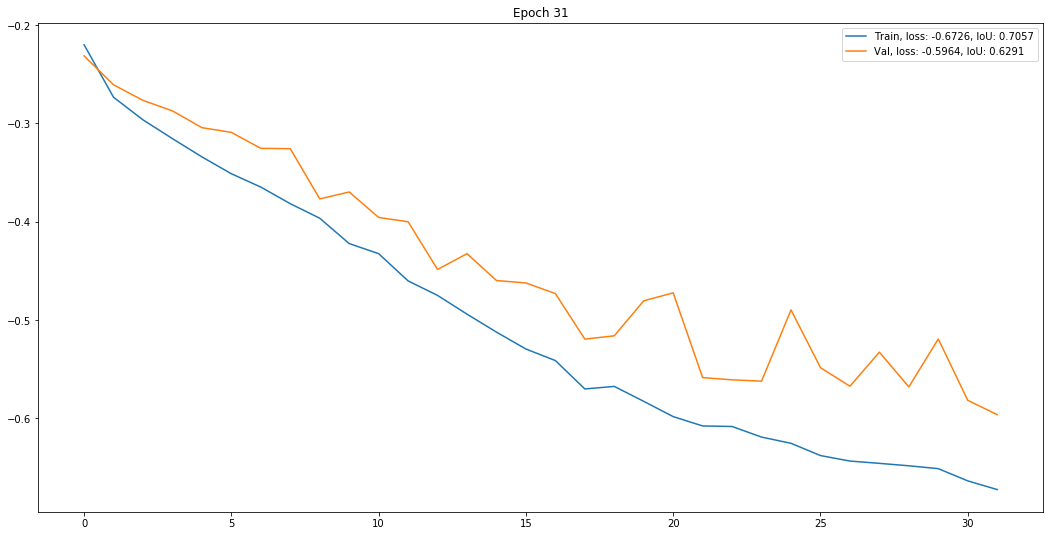

 Epoch: 32 of 70, Iter.: 44 of 44, Loss: -0.677276, Val. Loss: -0.594643
 Epoch: 32 of 70, Iter.: 44 of 44, IoU: 0.706821, Val. IoU: 0.625500


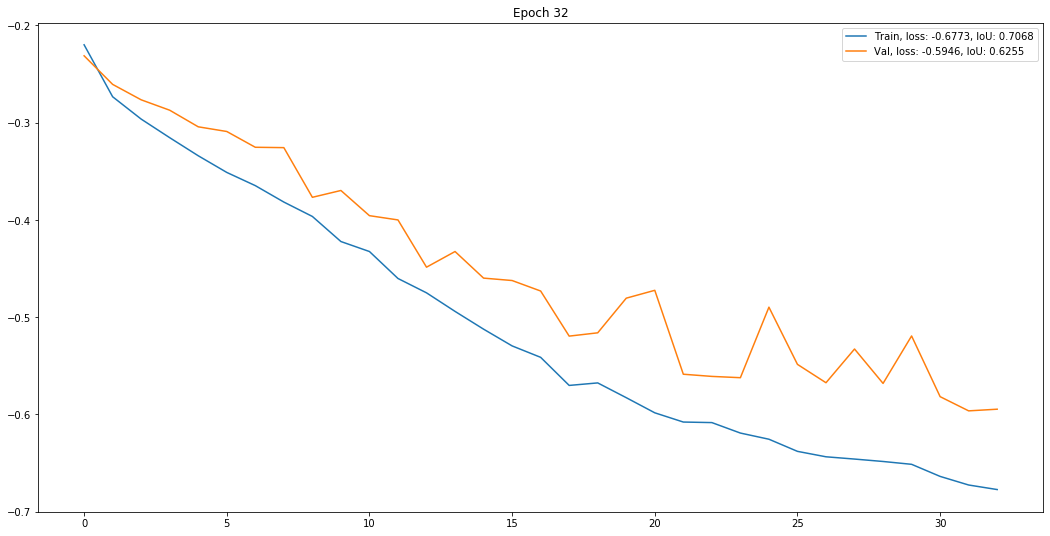

 Epoch: 33 of 70, Iter.: 44 of 44, Loss: -0.679918, Val. Loss: -0.598904
 Epoch: 33 of 70, Iter.: 44 of 44, IoU: 0.704109, Val. IoU: 0.626255


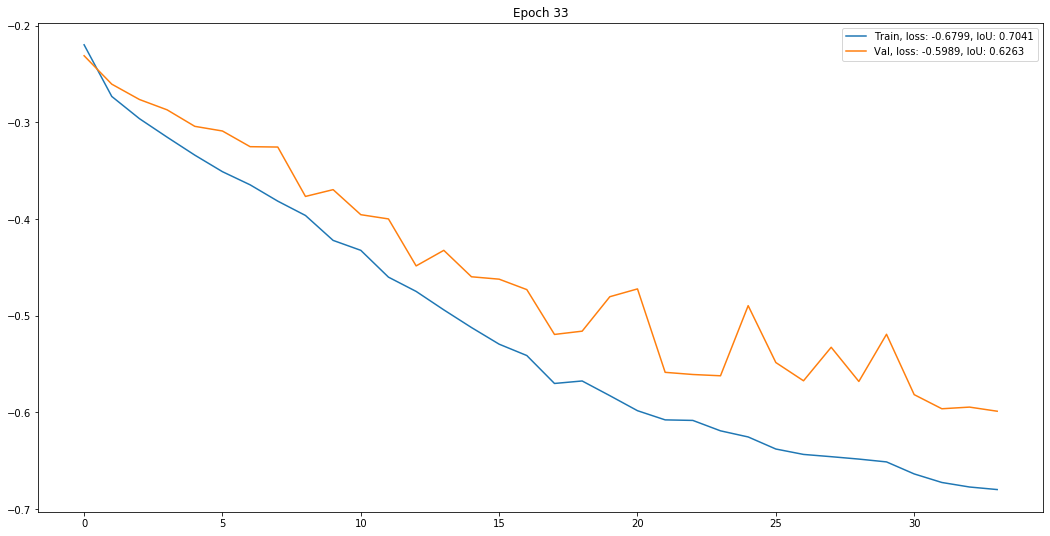

 Epoch: 34 of 70, Iter.: 44 of 44, Loss: -0.684475, Val. Loss: -0.592780
 Epoch: 34 of 70, Iter.: 44 of 44, IoU: 0.707765, Val. IoU: 0.609072


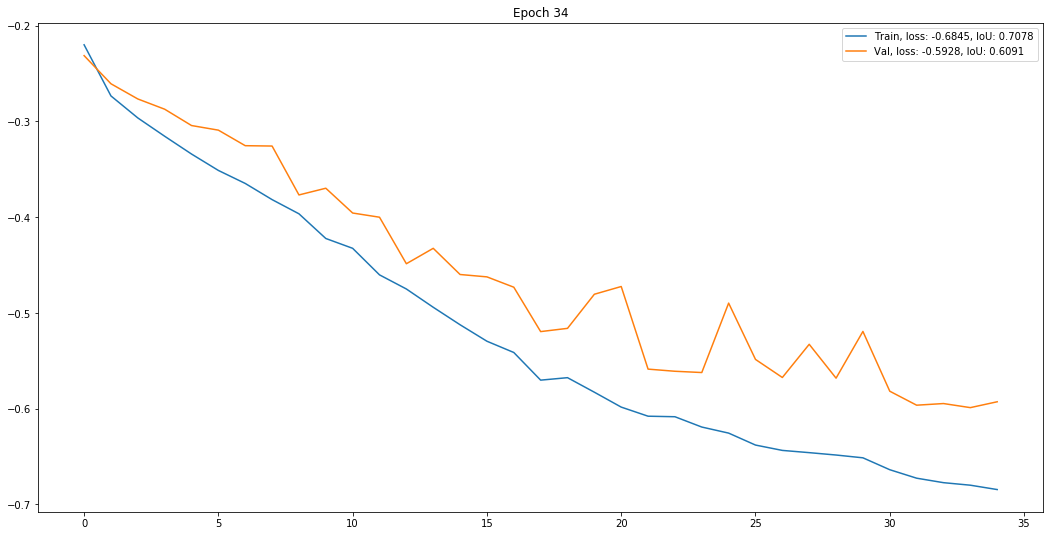

 Epoch: 35 of 70, Iter.: 44 of 44, Loss: -0.685990, Val. Loss: -0.581648
 Epoch: 35 of 70, Iter.: 44 of 44, IoU: 0.708380, Val. IoU: 0.600881


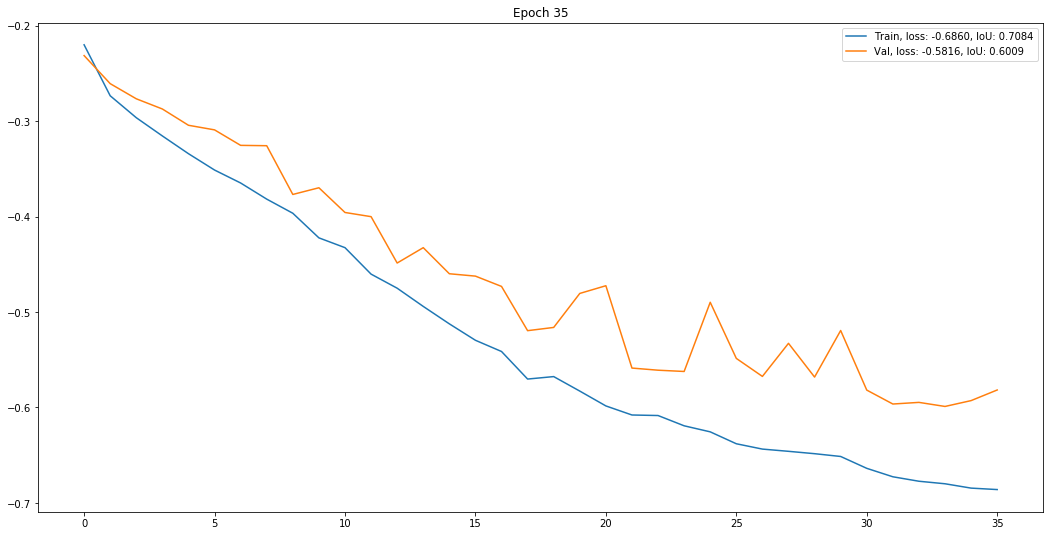

 Epoch: 36 of 70, Iter.: 44 of 44, Loss: -0.681025, Val. Loss: -0.637417
 Epoch: 36 of 70, Iter.: 44 of 44, IoU: 0.705551, Val. IoU: 0.661291


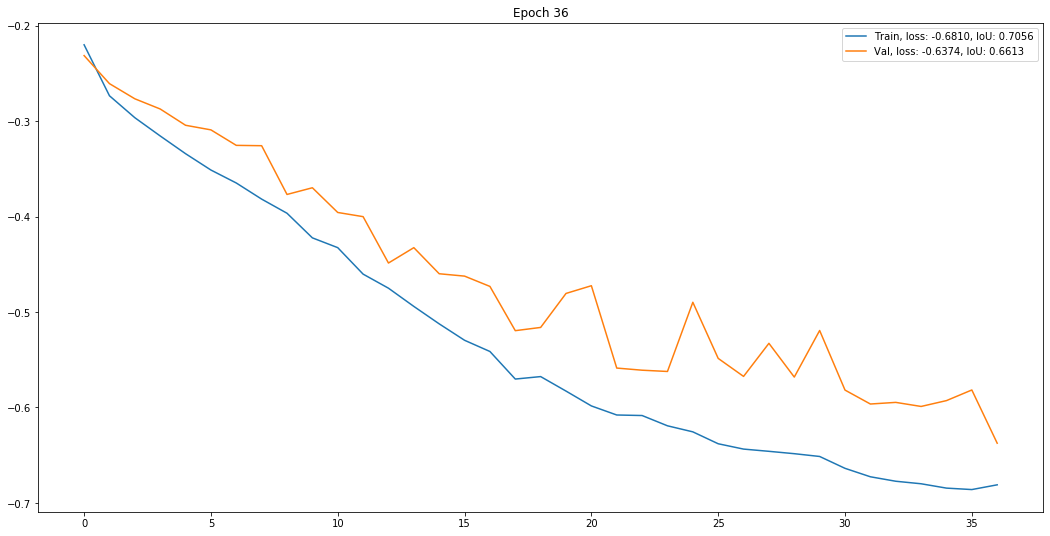

 Epoch: 37 of 70, Iter.: 44 of 44, Loss: -0.702450, Val. Loss: -0.646989
 Epoch: 37 of 70, Iter.: 44 of 44, IoU: 0.725401, Val. IoU: 0.666430


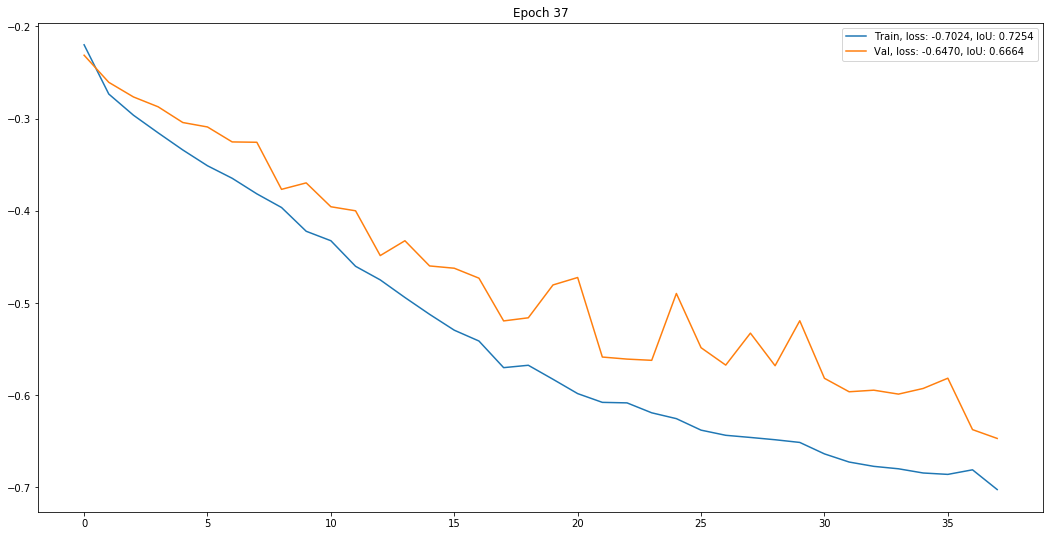

 Epoch: 38 of 70, Iter.: 44 of 44, Loss: -0.700790, Val. Loss: -0.511603
 Epoch: 38 of 70, Iter.: 44 of 44, IoU: 0.723025, Val. IoU: 0.549982


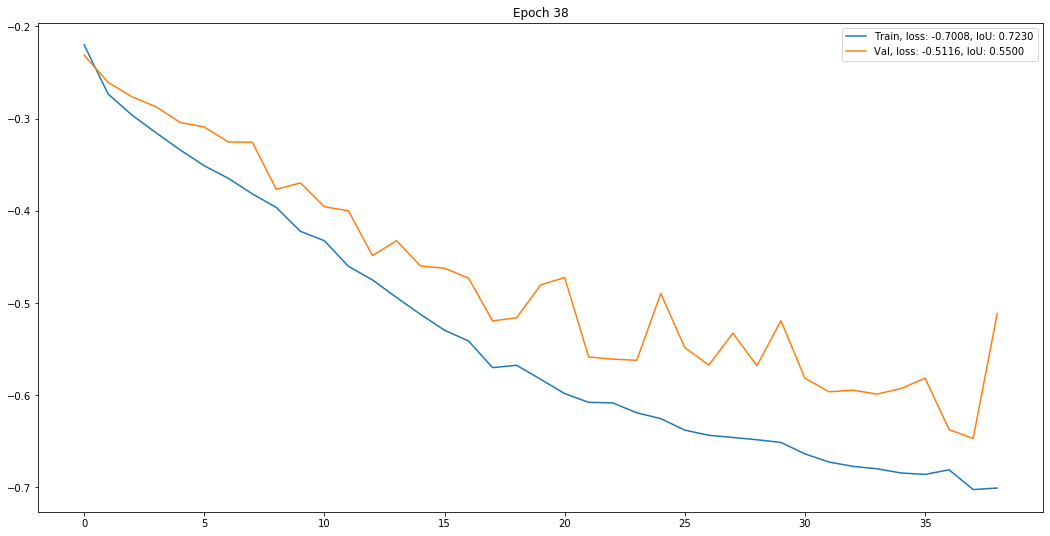

 Epoch: 39 of 70, Iter.: 44 of 44, Loss: -0.703226, Val. Loss: -0.558259
 Epoch: 39 of 70, Iter.: 44 of 44, IoU: 0.725026, Val. IoU: 0.585430


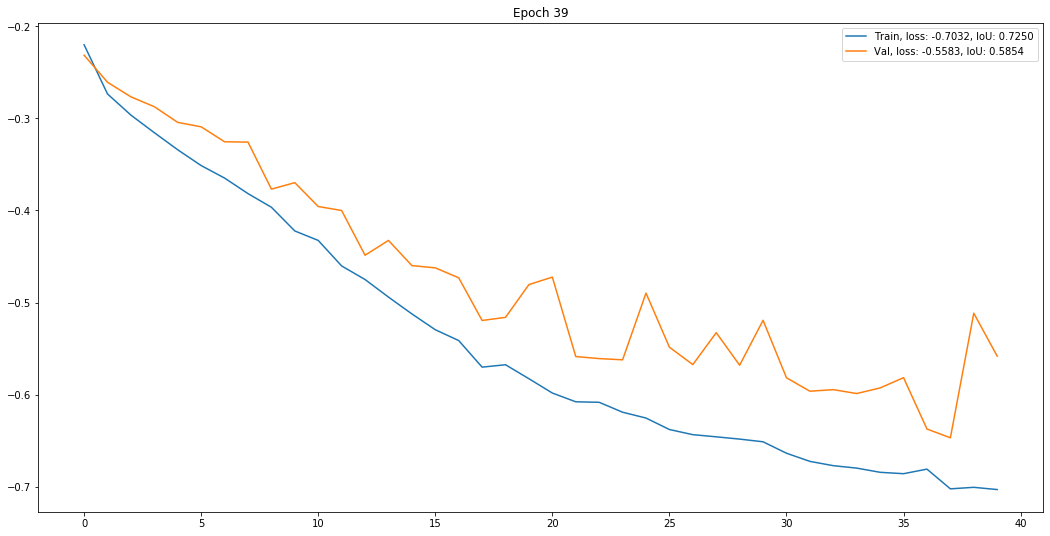

 Epoch: 40 of 70, Iter.: 44 of 44, Loss: -0.698003, Val. Loss: -0.639630
 Epoch: 40 of 70, Iter.: 44 of 44, IoU: 0.720780, Val. IoU: 0.664807


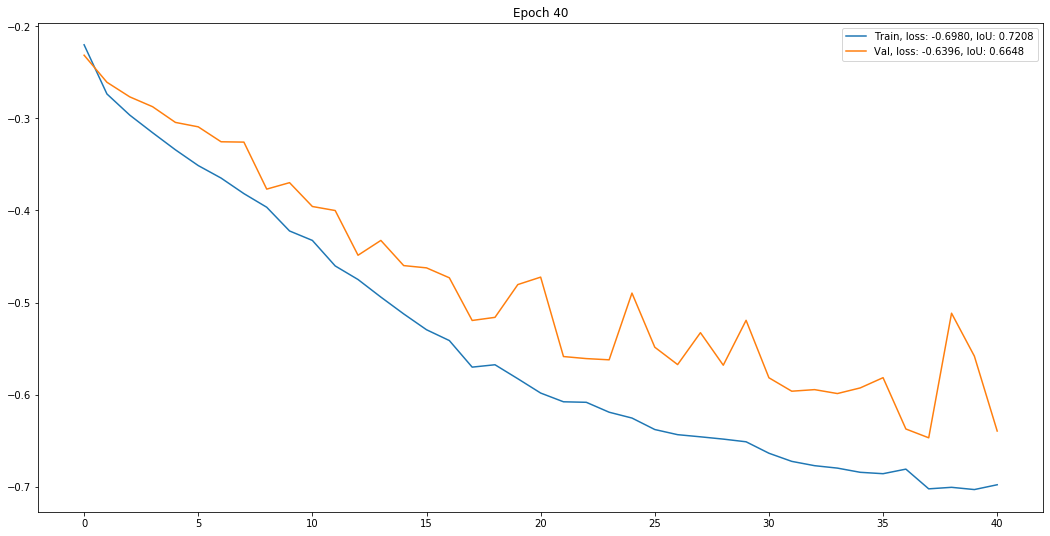

 Epoch: 41 of 70, Iter.: 44 of 44, Loss: -0.704825, Val. Loss: -0.653074
 Epoch: 41 of 70, Iter.: 44 of 44, IoU: 0.724786, Val. IoU: 0.658271


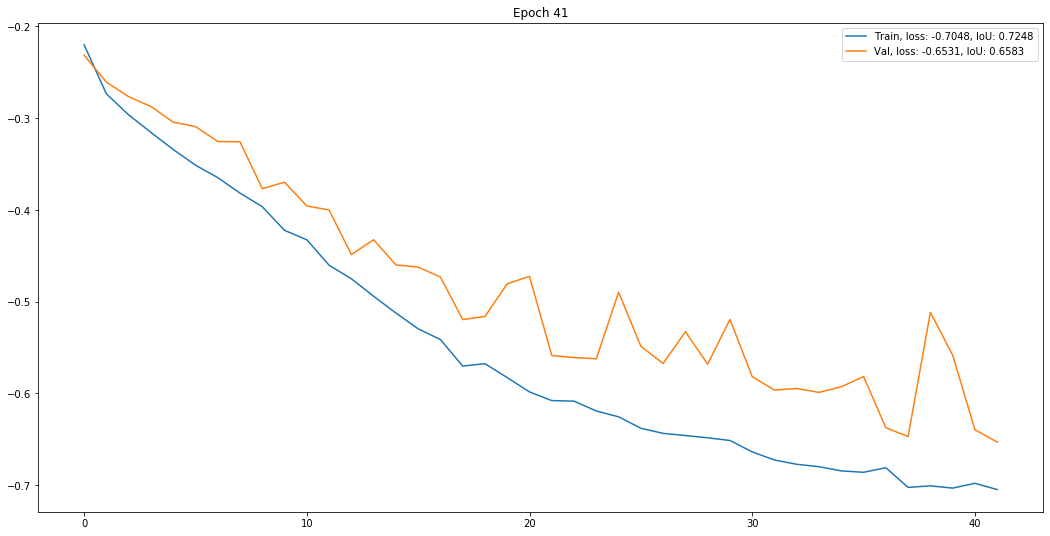

 Epoch: 42 of 70, Iter.: 44 of 44, Loss: -0.708267, Val. Loss: -0.638019
 Epoch: 42 of 70, Iter.: 44 of 44, IoU: 0.724982, Val. IoU: 0.660054


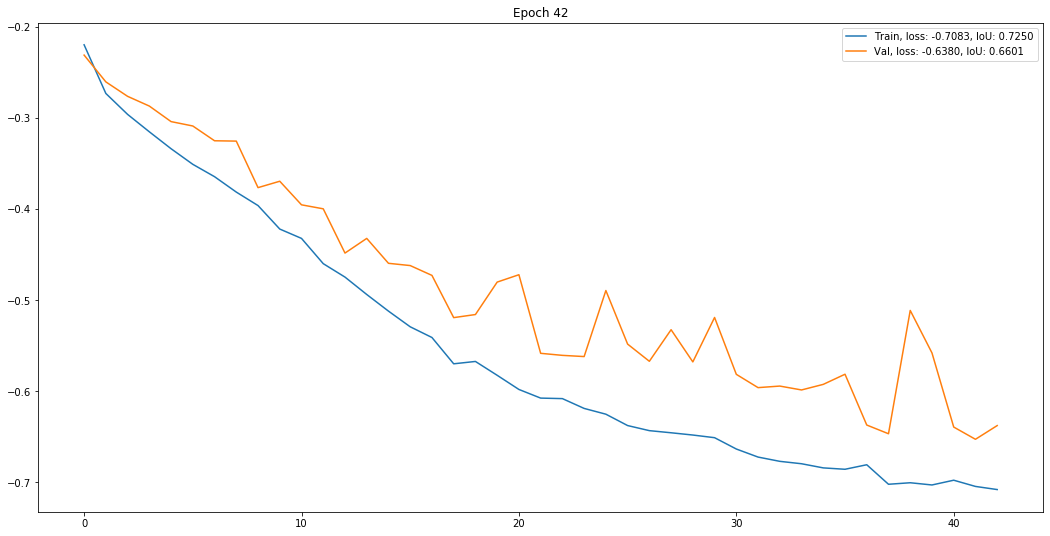

 Epoch: 43 of 70, Iter.: 44 of 44, Loss: -0.713346, Val. Loss: -0.615822
 Epoch: 43 of 70, Iter.: 44 of 44, IoU: 0.729891, Val. IoU: 0.645690


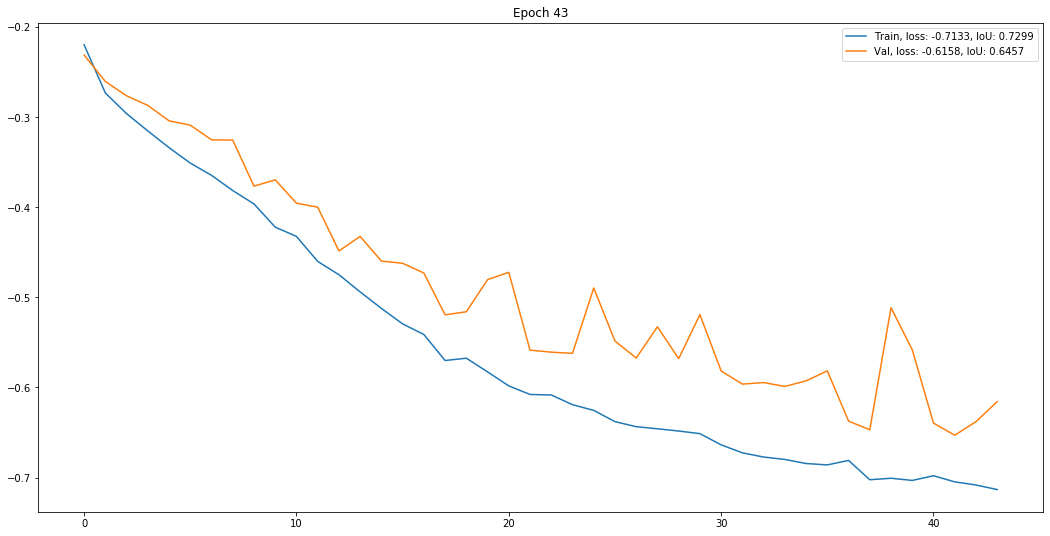

 Epoch: 44 of 70, Iter.: 44 of 44, Loss: -0.720052, Val. Loss: -0.576624
 Epoch: 44 of 70, Iter.: 44 of 44, IoU: 0.737389, Val. IoU: 0.611371


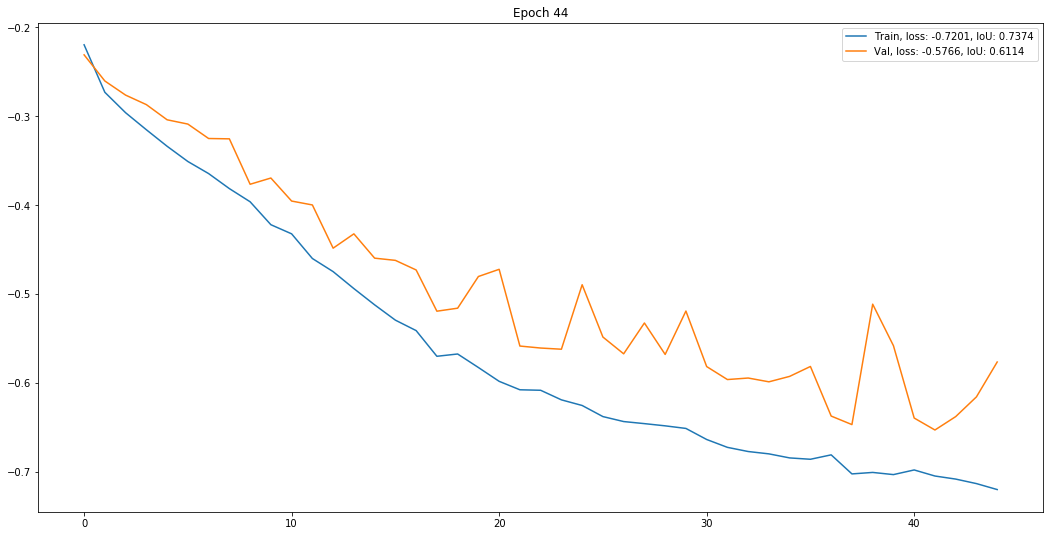

 Epoch: 45 of 70, Iter.: 44 of 44, Loss: -0.719146, Val. Loss: -0.633273
 Epoch: 45 of 70, Iter.: 44 of 44, IoU: 0.737158, Val. IoU: 0.658926


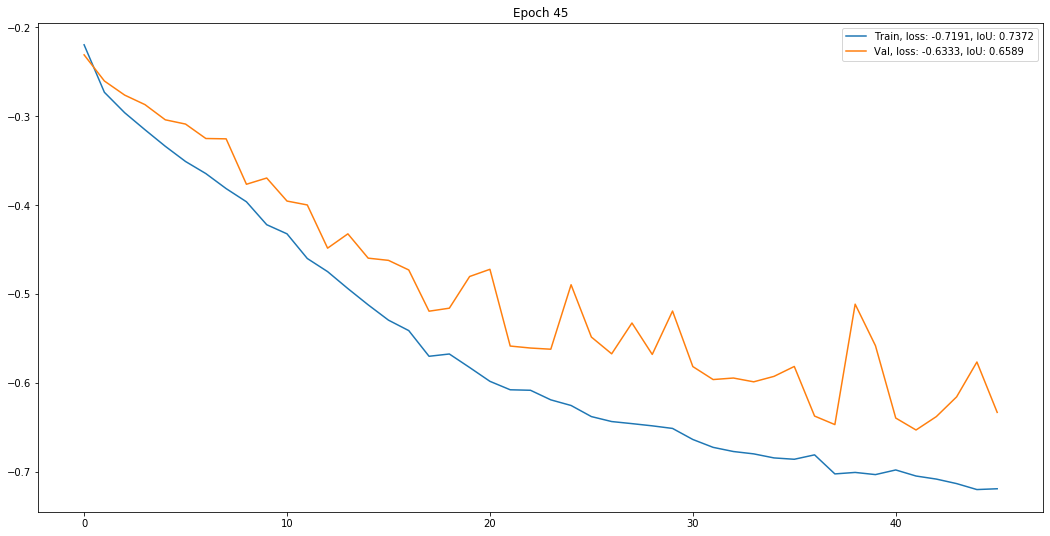

 Epoch: 46 of 70, Iter.: 44 of 44, Loss: -0.727058, Val. Loss: -0.610332
 Epoch: 46 of 70, Iter.: 44 of 44, IoU: 0.741010, Val. IoU: 0.626199


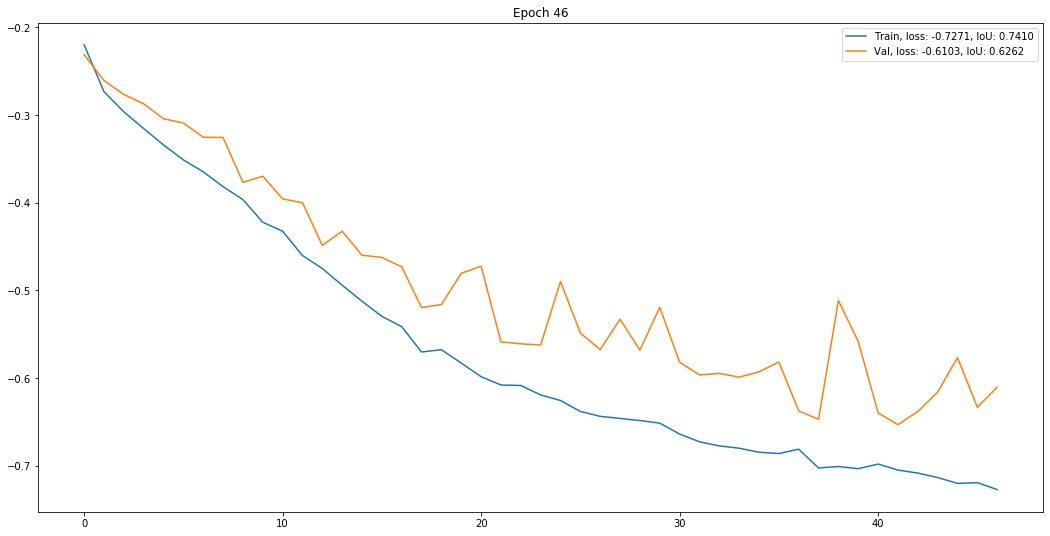

 Epoch: 47 of 70, Iter.: 44 of 44, Loss: -0.718581, Val. Loss: -0.650483
 Epoch: 47 of 70, Iter.: 44 of 44, IoU: 0.735181, Val. IoU: 0.676886


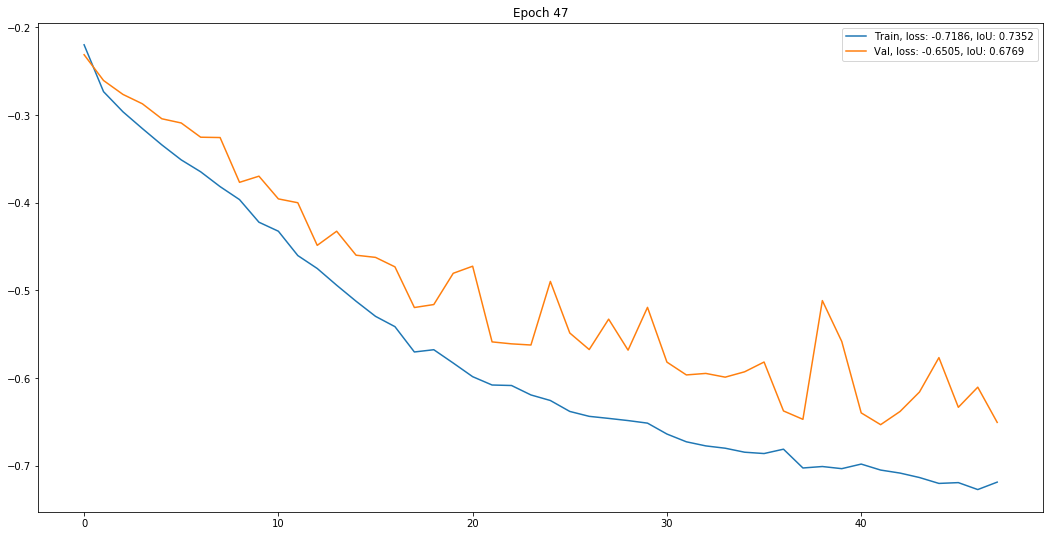

 Epoch: 48 of 70, Iter.: 44 of 44, Loss: -0.726846, Val. Loss: -0.638475
 Epoch: 48 of 70, Iter.: 44 of 44, IoU: 0.743188, Val. IoU: 0.656856


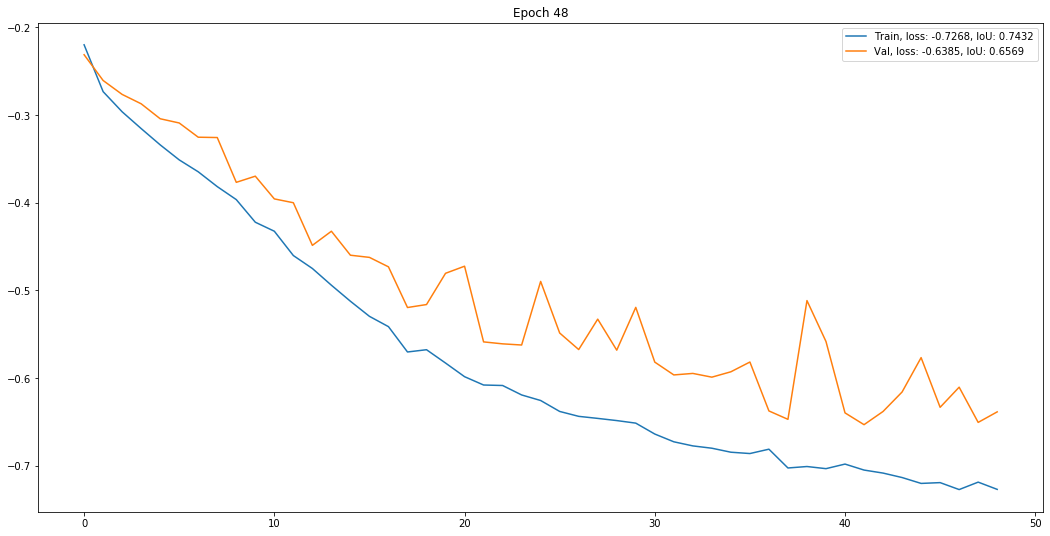

 Epoch: 49 of 70, Iter.: 44 of 44, Loss: -0.733257, Val. Loss: -0.636054
 Epoch: 49 of 70, Iter.: 44 of 44, IoU: 0.742649, Val. IoU: 0.659428


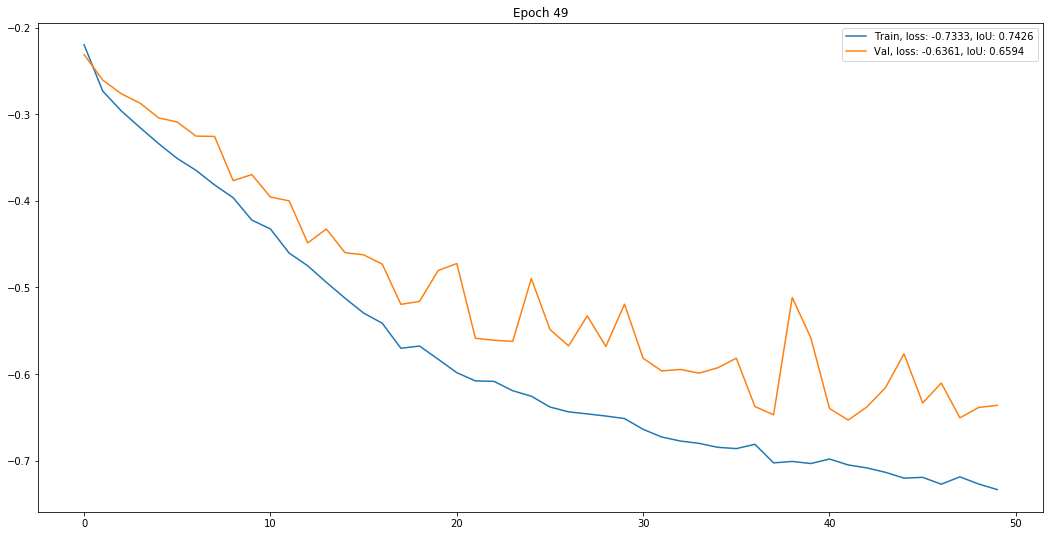

 Epoch: 50 of 70, Iter.: 44 of 44, Loss: -0.728024, Val. Loss: -0.636426
 Epoch: 50 of 70, Iter.: 44 of 44, IoU: 0.746154, Val. IoU: 0.661228


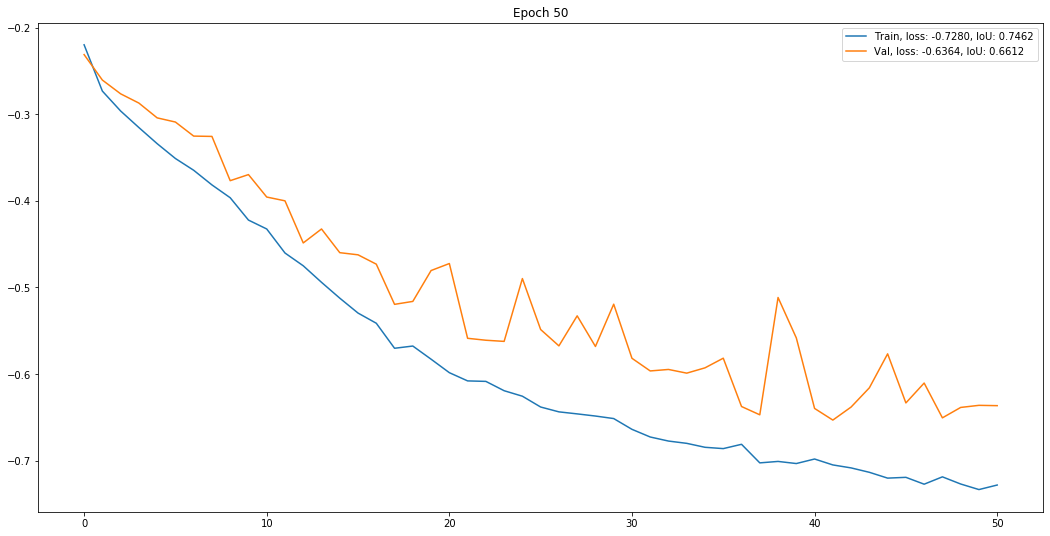

 Epoch: 51 of 70, Iter.: 44 of 44, Loss: -0.730104, Val. Loss: -0.652699
 Epoch: 51 of 70, Iter.: 44 of 44, IoU: 0.747679, Val. IoU: 0.676129


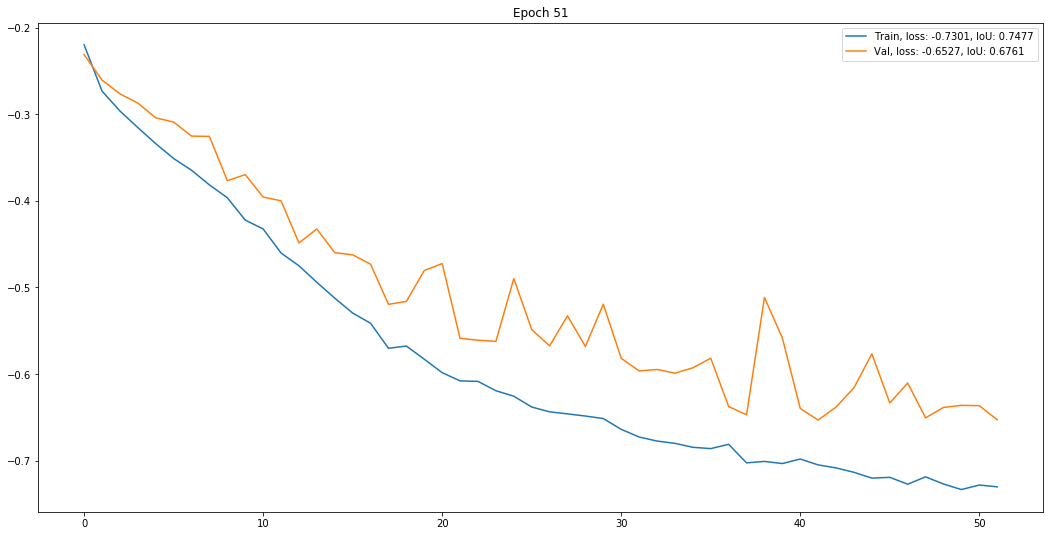

 Epoch: 52 of 70, Iter.: 44 of 44, Loss: -0.737896, Val. Loss: -0.652992
 Epoch: 52 of 70, Iter.: 44 of 44, IoU: 0.748119, Val. IoU: 0.681544


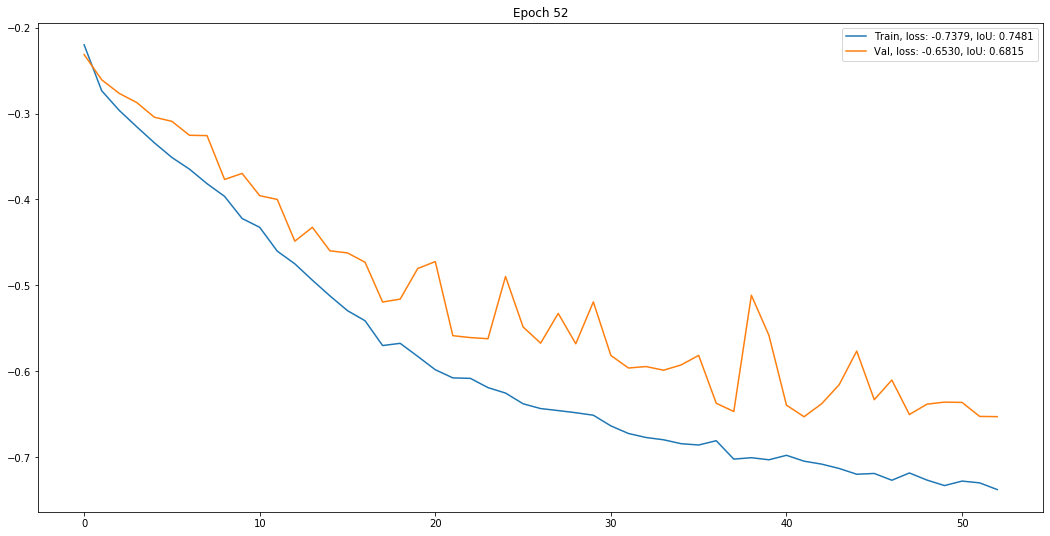

 Epoch: 53 of 70, Iter.: 44 of 44, Loss: -0.745175, Val. Loss: -0.666043
 Epoch: 53 of 70, Iter.: 44 of 44, IoU: 0.755636, Val. IoU: 0.682771


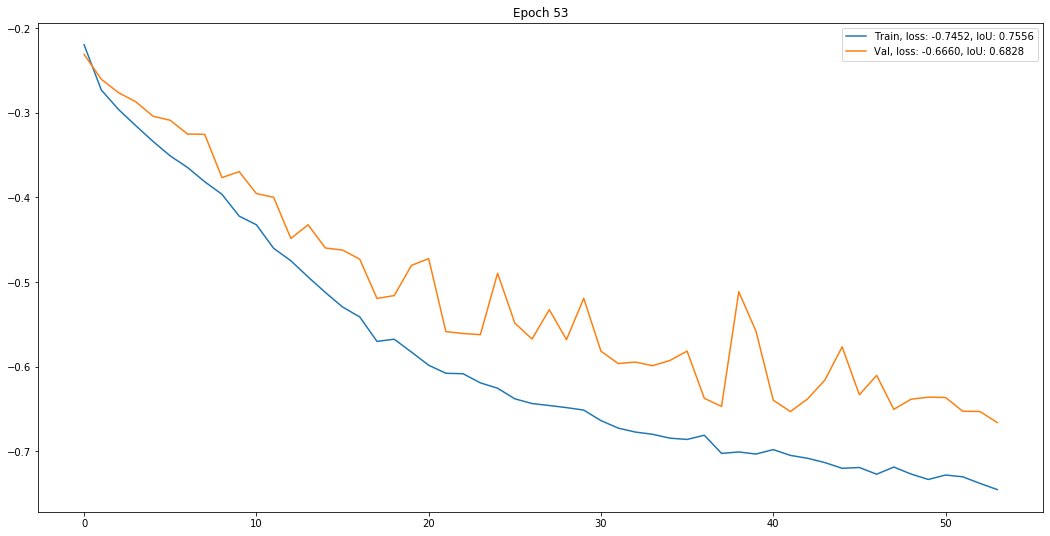

 Epoch: 54 of 70, Iter.: 44 of 44, Loss: -0.725575, Val. Loss: -0.673808
 Epoch: 54 of 70, Iter.: 44 of 44, IoU: 0.743049, Val. IoU: 0.703030


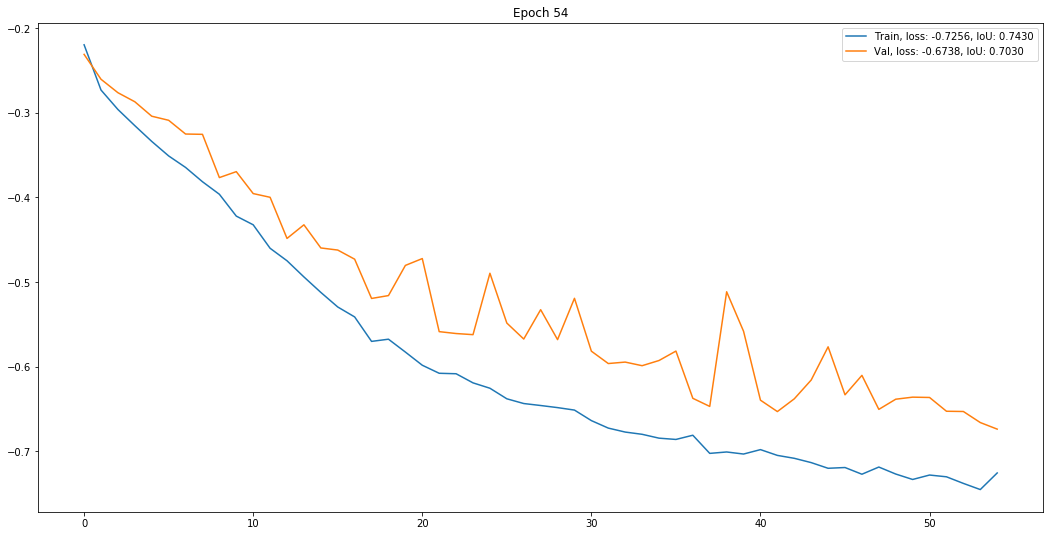

 Epoch: 55 of 70, Iter.: 44 of 44, Loss: -0.739910, Val. Loss: -0.671598
 Epoch: 55 of 70, Iter.: 44 of 44, IoU: 0.756591, Val. IoU: 0.699936


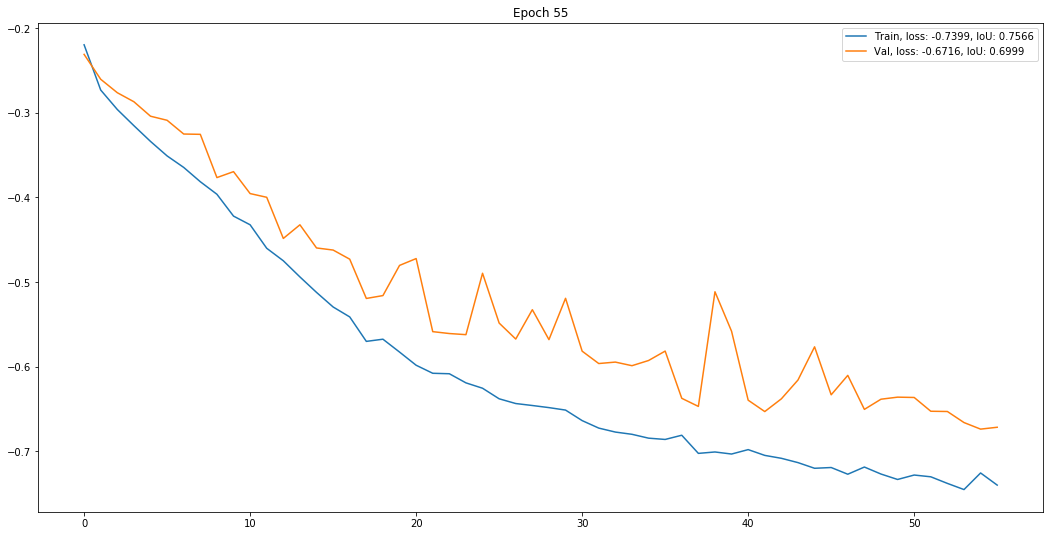

 Epoch: 56 of 70, Iter.: 44 of 44, Loss: -0.745178, Val. Loss: -0.575389
 Epoch: 56 of 70, Iter.: 44 of 44, IoU: 0.756189, Val. IoU: 0.600572


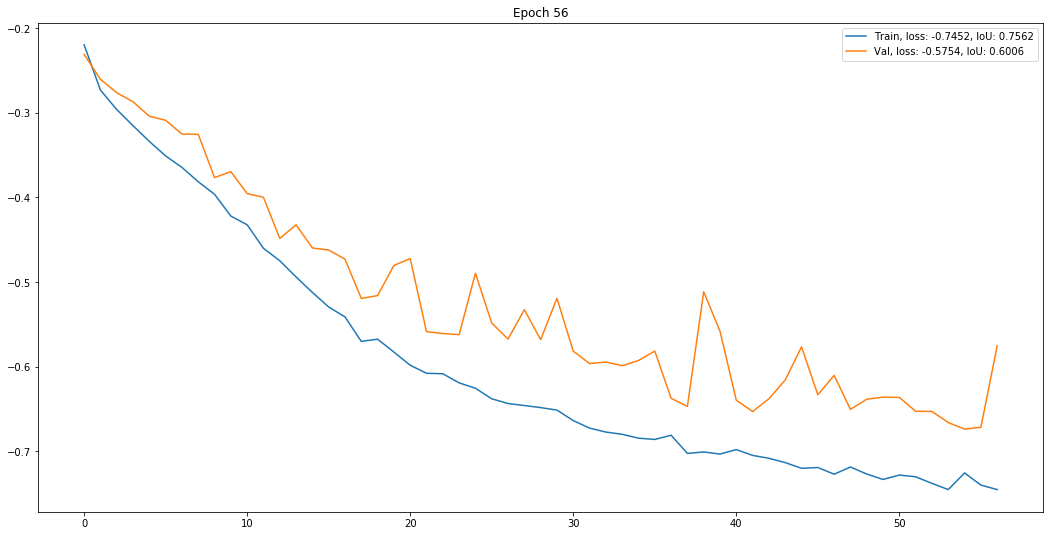

 Epoch: 57 of 70, Iter.: 44 of 44, Loss: -0.738769, Val. Loss: -0.614162
 Epoch: 57 of 70, Iter.: 44 of 44, IoU: 0.753538, Val. IoU: 0.637465


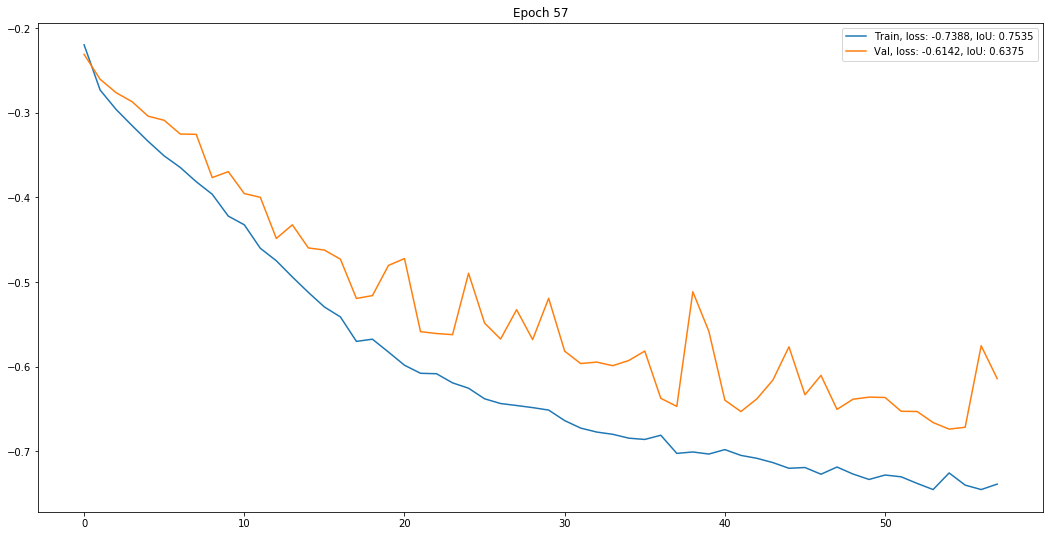

 Epoch: 58 of 70, Iter.: 44 of 44, Loss: -0.732820, Val. Loss: -0.654904
 Epoch: 58 of 70, Iter.: 44 of 44, IoU: 0.749381, Val. IoU: 0.676629


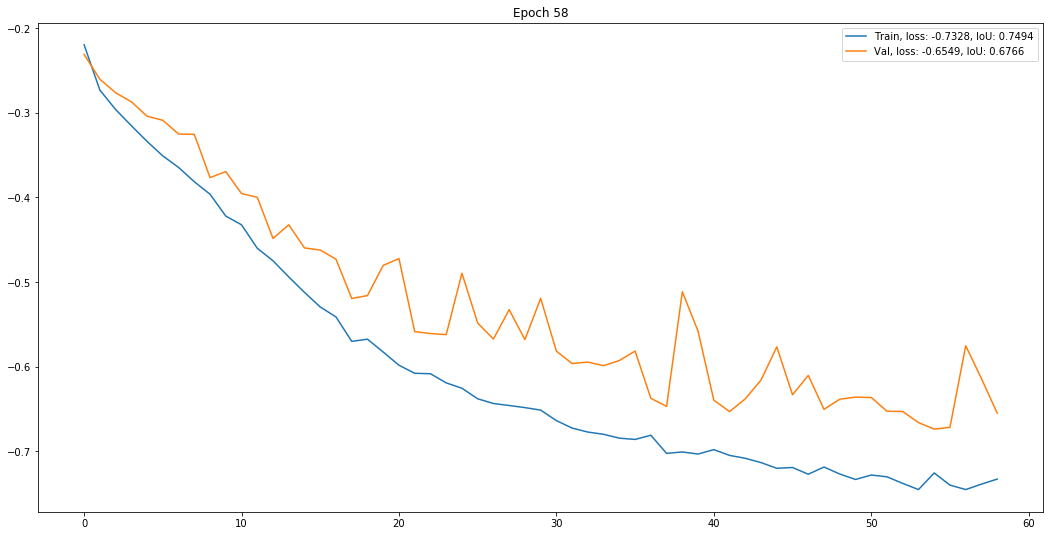

 Epoch: 59 of 70, Iter.: 44 of 44, Loss: -0.743155, Val. Loss: -0.664375
 Epoch: 59 of 70, Iter.: 44 of 44, IoU: 0.757302, Val. IoU: 0.690825


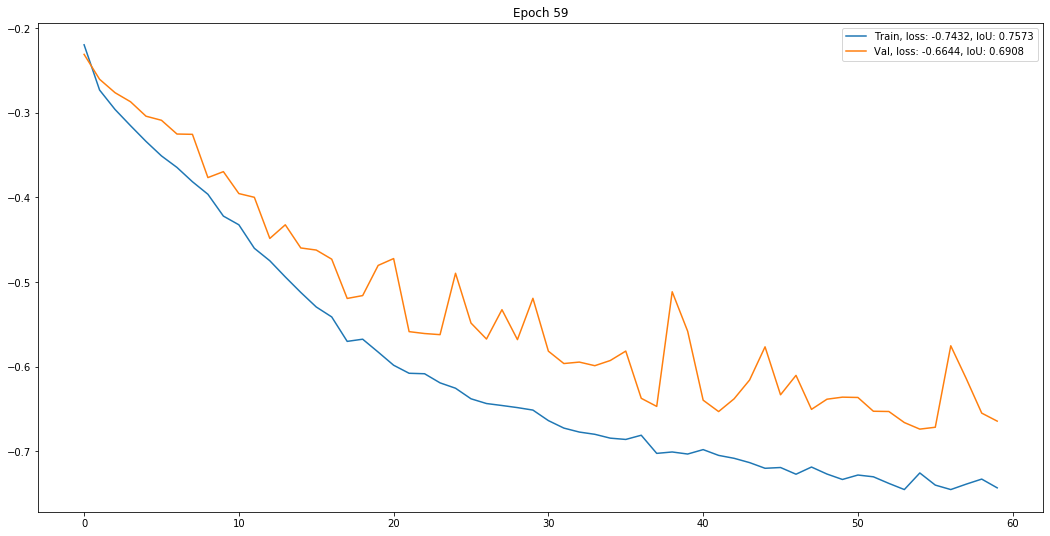

 Epoch: 60 of 70, Iter.: 44 of 44, Loss: -0.737172, Val. Loss: -0.554286
 Epoch: 60 of 70, Iter.: 44 of 44, IoU: 0.750081, Val. IoU: 0.582695


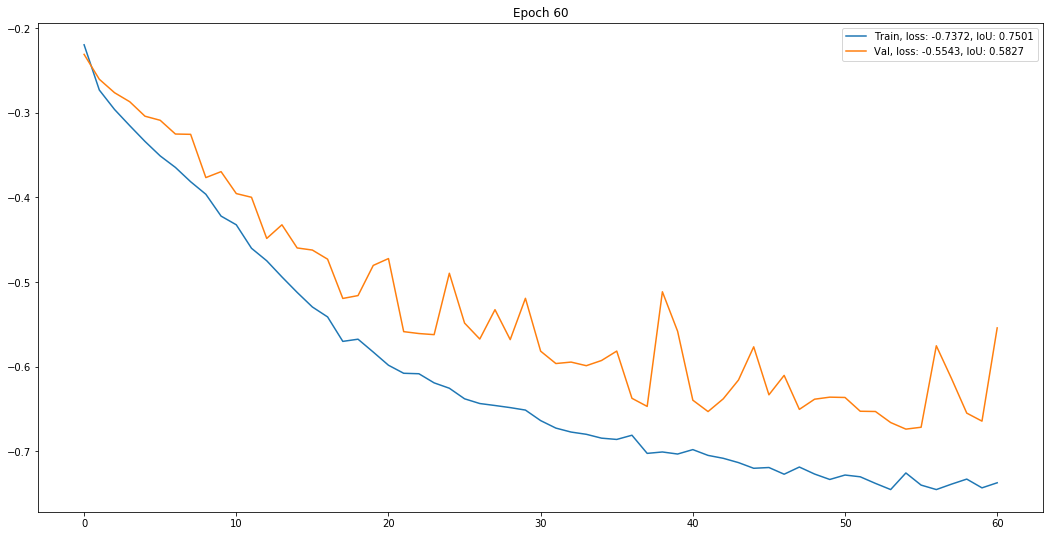

 Epoch: 61 of 70, Iter.: 44 of 44, Loss: -0.739572, Val. Loss: -0.560538
 Epoch: 61 of 70, Iter.: 44 of 44, IoU: 0.752975, Val. IoU: 0.599252


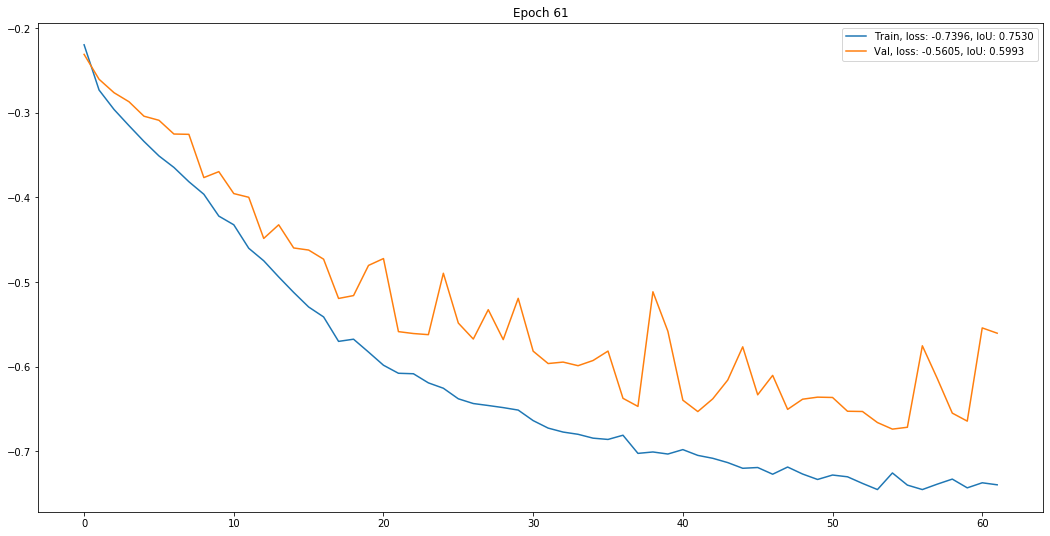

 Epoch: 62 of 70, Iter.: 44 of 44, Loss: -0.747605, Val. Loss: -0.610396
 Epoch: 62 of 70, Iter.: 44 of 44, IoU: 0.761140, Val. IoU: 0.653791


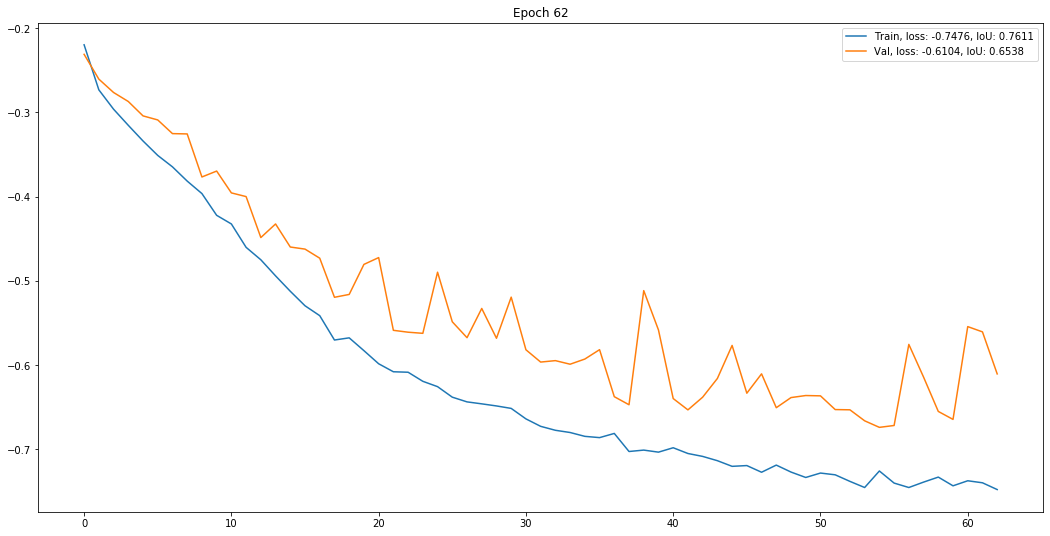

 Epoch: 63 of 70, Iter.: 44 of 44, Loss: -0.760890, Val. Loss: -0.665708
 Epoch: 63 of 70, Iter.: 44 of 44, IoU: 0.765567, Val. IoU: 0.680191


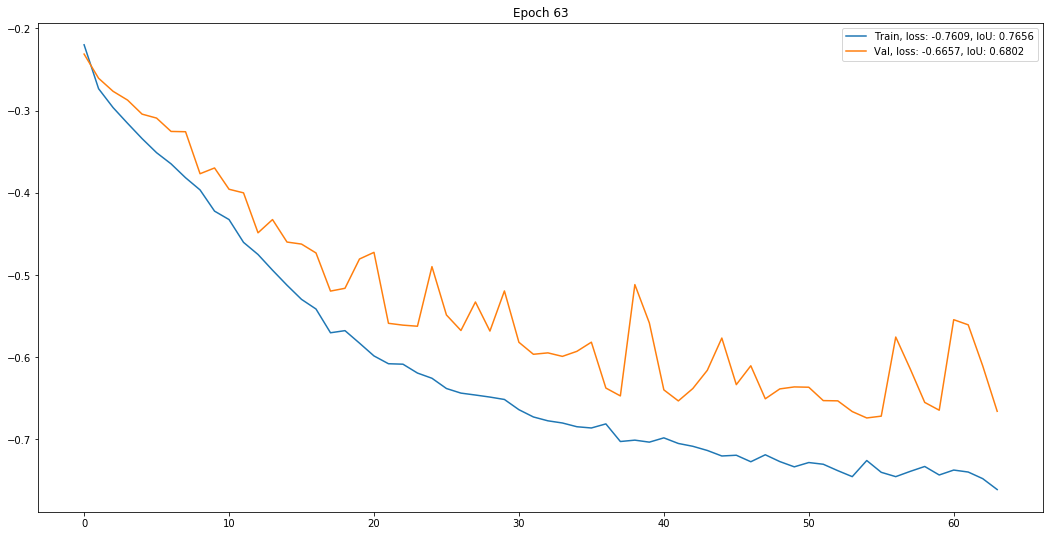

 Epoch: 64 of 70, Iter.: 44 of 44, Loss: -0.757061, Val. Loss: -0.662276
 Epoch: 64 of 70, Iter.: 44 of 44, IoU: 0.765123, Val. IoU: 0.682702


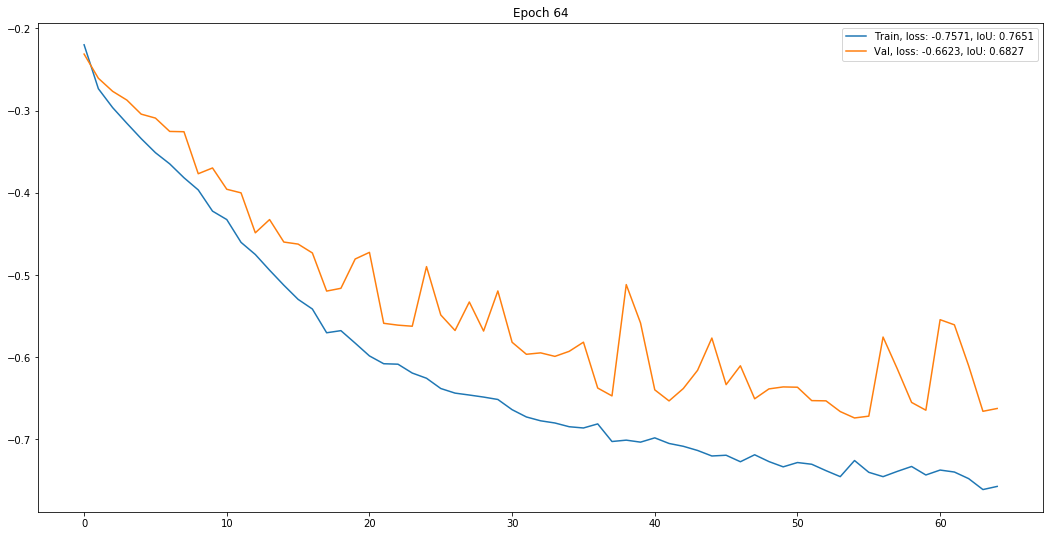

 Epoch: 65 of 70, Iter.: 44 of 44, Loss: -0.755863, Val. Loss: -0.648038
 Epoch: 65 of 70, Iter.: 44 of 44, IoU: 0.764606, Val. IoU: 0.659351


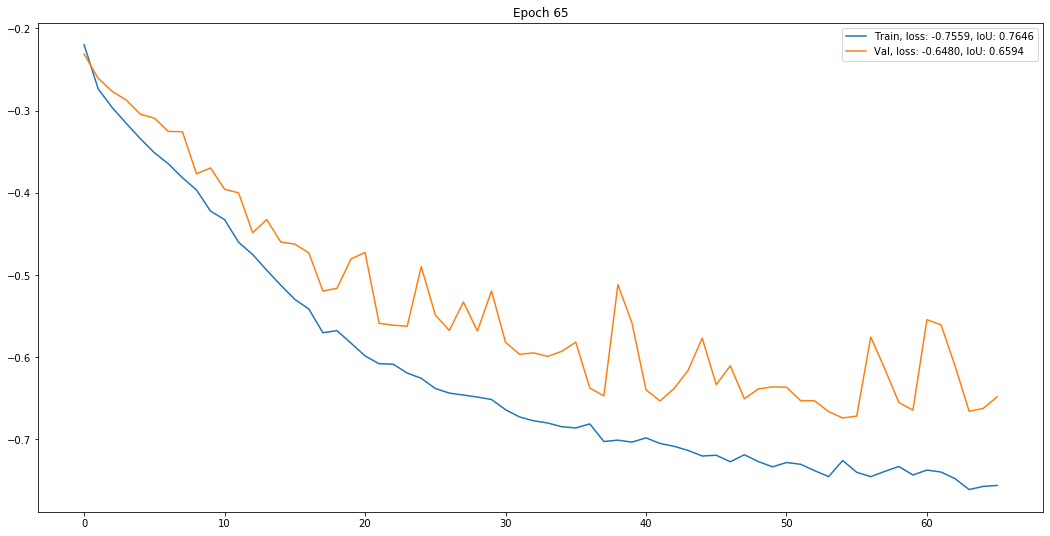

 Epoch: 66 of 70, Iter.: 44 of 44, Loss: -0.744985, Val. Loss: -0.668179
 Epoch: 66 of 70, Iter.: 44 of 44, IoU: 0.762536, Val. IoU: 0.693567


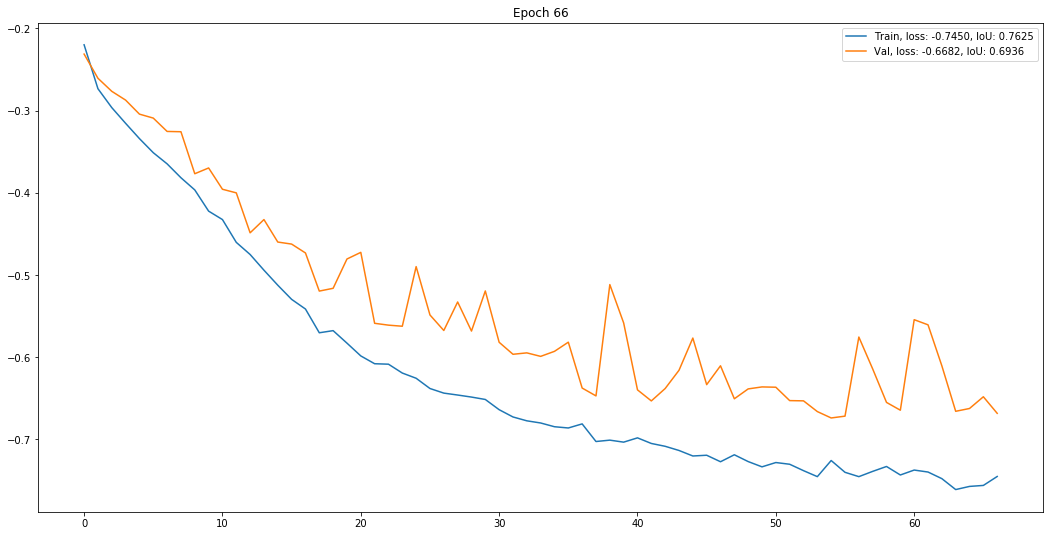

 Epoch: 67 of 70, Iter.: 44 of 44, Loss: -0.761432, Val. Loss: -0.661180
 Epoch: 67 of 70, Iter.: 44 of 44, IoU: 0.769259, Val. IoU: 0.679878


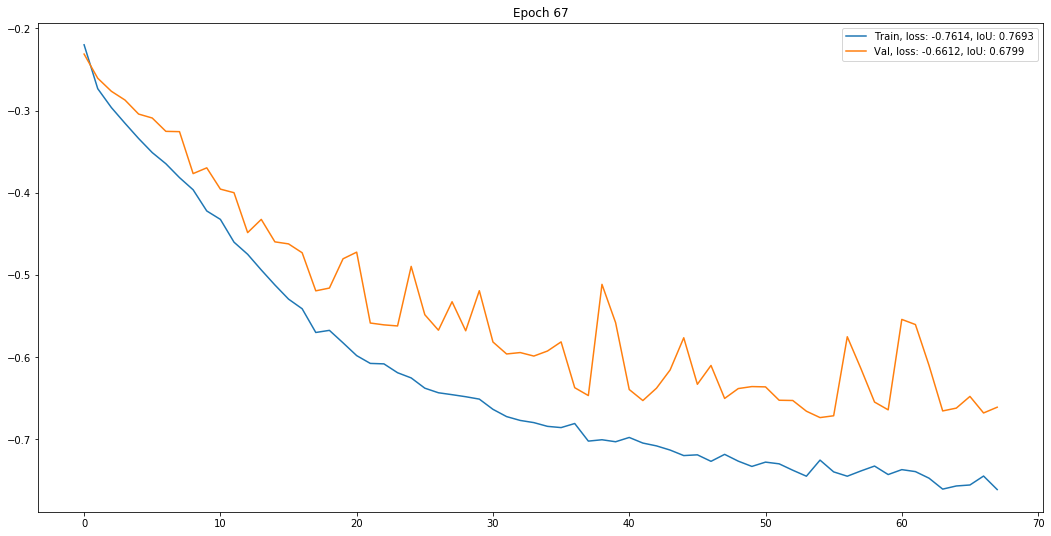

 Epoch: 68 of 70, Iter.: 44 of 44, Loss: -0.755652, Val. Loss: -0.656879
 Epoch: 68 of 70, Iter.: 44 of 44, IoU: 0.767302, Val. IoU: 0.697345


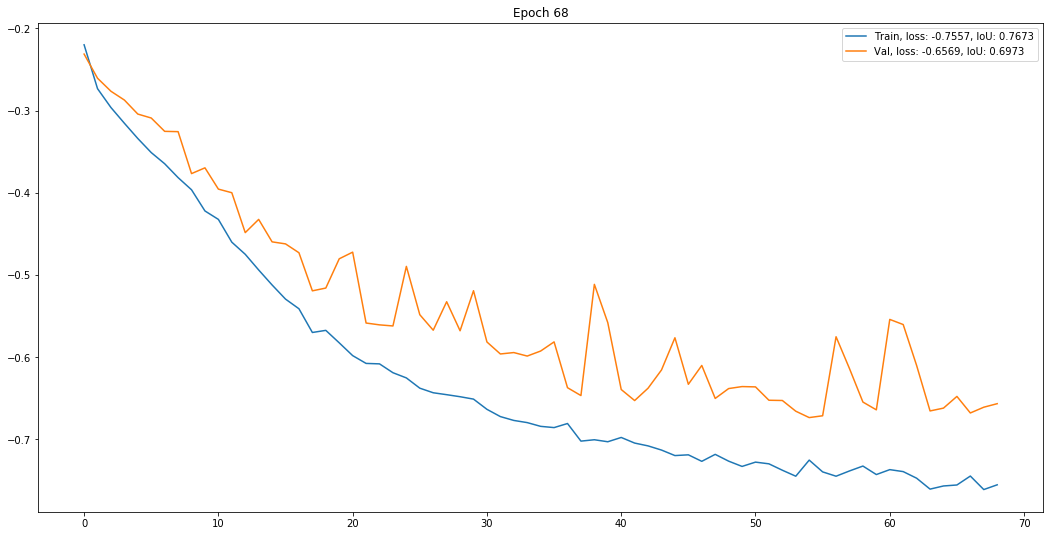

 Epoch: 69 of 70, Iter.: 44 of 44, Loss: -0.761847, Val. Loss: -0.656888
 Epoch: 69 of 70, Iter.: 44 of 44, IoU: 0.770302, Val. IoU: 0.676408


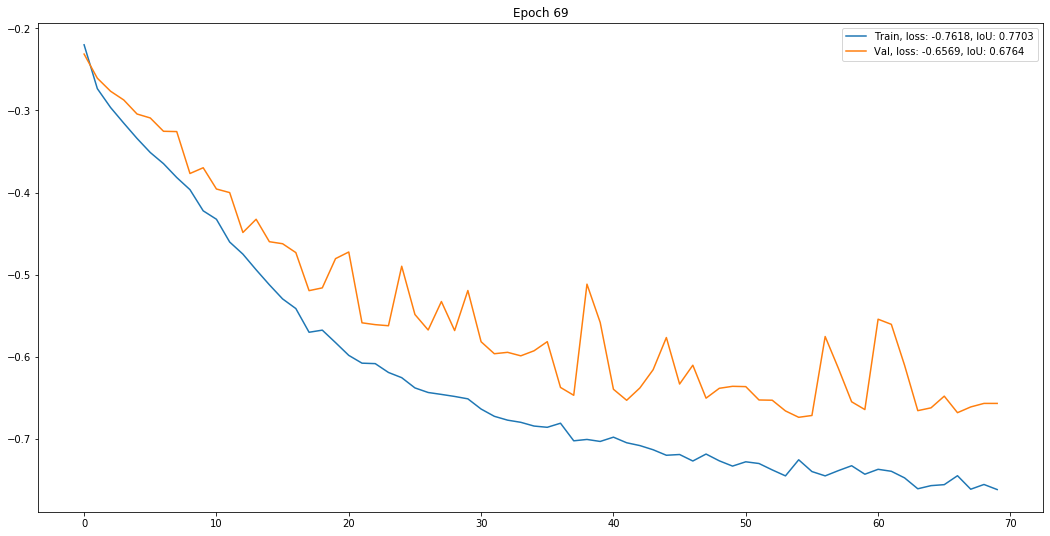

In [20]:
train_losses = []
val_losses = []
best_iou = 0
best_loss = np.Inf
best_epoch = -1


for epoch in range(epochs):
    running_loss = 0
    running_iou = 0
    # Train
    model.train()
    for i, (imgs, masks) in enumerate(dataloader_train):
        imgs, masks = imgs.to(DEVICE), masks.to(DEVICE)
        
        prediction = model(imgs)
        
        optimiser.zero_grad()
        loss = criterion(prediction, masks)
        loss.backward()
        optimiser.step()
        
        running_loss += loss.item()
        print("\r Epoch: {} of {}, Iter.: {} of {}, Loss: {:.6f}".format(epoch, epochs, i, len(dataloader_train), running_loss/(i+1)), end="")
        
        running_iou += iou_pytorch_eval(prediction, masks)
        print("\r Epoch: {} of {}, Iter.: {} of {}, IoU:  {:.6f}".format(epoch, epochs, i, len(dataloader_train), running_iou/(i+1)), end="")
        
    # Validate
    model.eval()
    val_loss = 0
    val_iou = 0
    for i, (imgs, masks) in enumerate(dataloader_val):
        imgs, masks = imgs.to(DEVICE), masks.to(DEVICE)
        
        prediction = model(imgs)
        loss = criterion(prediction, masks)
        val_loss += loss.item()
        print("\r Epoch: {} of {}, Iter.: {} of {}, Loss: {:.6f}, Val. Loss: {:.6f}".format(epoch, epochs, len(dataloader_train), len(dataloader_train), running_loss/len(dataloader_train), val_loss/(i+1)), end="")
        
        val_iou += iou_pytorch_eval(prediction, masks)
        print("\r Epoch: {} of {}, Iter.: {} of {}, IoU: {:.6f}, Val. IoU: {:.6f}".format(epoch, epochs, len(dataloader_train), len(dataloader_train), running_iou/len(dataloader_train), val_iou/(i+1)), end="")
    
    
    # compute overall epoch losses
    epoch_train_loss = running_loss/len(dataloader_train)
    train_losses.append(epoch_train_loss)
    epoch_val_loss = val_loss/len(dataloader_val)
    val_losses.append(epoch_val_loss)
    # compute overall epoch iou-s
    epoch_train_iou = running_iou/len(dataloader_train)
    epoch_val_iou = val_iou/len(dataloader_val)
    
    print("\r Epoch: {} of {}, Iter.: {} of {}, Loss: {:.6f}, Val. Loss: {:.6f}".format(epoch, epochs, len(dataloader_train), len(dataloader_train), epoch_train_loss, epoch_val_loss))
    print("\r Epoch: {} of {}, Iter.: {} of {}, IoU: {:.6f}, Val. IoU: {:.6f}".format(epoch, epochs, len(dataloader_train), len(dataloader_train), epoch_train_iou, epoch_val_iou))
    
    
    # plot 
    plt.figure(figsize=(18, 9))
    plt.plot(np.arange(len(train_losses)), train_losses, label=f'Train, loss: {epoch_train_loss:.4f}, IoU: {epoch_train_iou:.4f}')
    plt.plot(np.arange(len(val_losses)), val_losses, label=f'Val, loss: {epoch_val_loss:.4f}, IoU: {epoch_val_iou:.4f}')
    plt.title(f'Epoch {epoch}')
    plt.legend(loc='best')
    plt.show()
    
    # save if best results
    best_iou = max(best_iou, epoch_val_iou)
    best_loss = min(best_loss, epoch_val_loss)
    best_epoch = epoch if best_iou == epoch_val_iou else best_epoch
    
    if best_epoch == epoch:
        # print('Saving..')
        state = {
            'net': model.state_dict(),
            'iou': best_iou,
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoint'):
            os.mkdir('checkpoint')
        torch.save(state, f'../checkpoints/ckpt_{model_name}.pth')

In [21]:
best_epoch, best_iou

(54, tensor(0.7030, device='cuda:0'))

In [23]:
# # Begin training
# model = UNet(channel_in=3, channel_out=1)
# model = model.to(DEVICE)

# train_losses = []
# test_losses = []
# best_iou = 0
# best_epoch = -1

# for epoch in notebook.tqdm(range(30)):
#     train_loss, train_iou = train(model, optimiser, criterion, dataloader_train, epoch, DEVICE)
#     train_losses.append(train_loss)
    
#     test_loss, test_iou = test(model, criterion, dataloader_val, epoch, DEVICE, best_iou, model_name='Unet_BCEWithLogitsLoss')
#     #scheduler.step(test_loss) # not always needed
#     test_losses.append(test_loss)
    
#     best_iou = max(best_iou, test_iou)
#     best_epoch = epoch if best_iou == test_iou else best_epoch

#     clear_output()
    
#     plt.figure(figsize=(18, 9))
#     plt.plot(np.arange(len(train_losses)), train_losses, label=f'Train, loss: {train_loss:.4f}, IoU: {train_iou}%')
#     plt.plot(np.arange(len(test_losses)), test_losses, label=f'Test, loss: {test_loss:.4f}, IoU: {test_iou}%')
#     plt.title(f'Epoch {epoch}')
#     plt.legend(loc='best')
#     plt.show()

## Evaluate validation performance (256*256 sized images)

In [24]:
%ls ../checkpoints

ckpt_UNet_BCELoss_baseline.pth     ckpt_UNet_IoULoss_augmented.pth
ckpt_UNet_IoUBCELoss_baseline.pth  ckpt_UNet_IoULoss_baseline.pth
ckpt_UNet_IoULoss_attention.pth    README.md


In [25]:
# model_name = 'UNet_BCELoss_augmented'
model_name = 'UNet_IoULoss_augmented'
# model_name = 'UNet_IoUBCELoss_augmented'


# Begin training
model = UNet(channel_in=3, channel_out=1)
model = model.to(DEVICE) # load model to DEVICE

# load best weights and put into the evaluation mode
model.load_state_dict(torch.load(f'../checkpoints/ckpt_{model_name}.pth')['net'])

<All keys matched successfully>

In [26]:
print('Best epoch:', torch.load(f'../checkpoints/ckpt_{model_name}.pth')['epoch'])
print(f'Validation IoU ({_size[0]}x{_size[0]}):', torch.load(f'../checkpoints/ckpt_{model_name}.pth')['iou'].item())

Best epoch: 54
Validation IoU (256x256): 0.7030300498008728
